In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#import pysal as ps # Wczytanie danych z pliku dbf

## 1. Grupowanie
Grupowanie (klasteryzacja) jest metodą uczenia bez nadzoru (Unsupervised Learning). Algorytm ma za zadanie pogrupowanie zbioru danych na klasy, przy wykorzystaniu podobieństwa cech między poszczególnymi rekordami. Podobieństwo to określane jest przy pomocy różnych metryk np.:
1. Odległość Euklidesowa lub Miejska - dla zmiennych ciągłych;
2. Odległość Hamminga - dla zmiennych dyskretnych;

Istnieją 2 podstawowe grupy algorytmów grupujących:
1. Metody k-średnich (ang. k_means);
2. Motody Hierarchiczne;

### 1.1 Generowanie zbioru danych
Na początku wygenerujemy przykładowe dane. Do tego celu wykorzystamy bibliotekę funkcję *make_blobs* należącą do pakietu *sklearn.datasets*. Dane, które wygenerujemy będą posiadać 500 próbek, reprezentowanych przez 2 cechy, skupione wokół 4 obszarów (centroidów).  

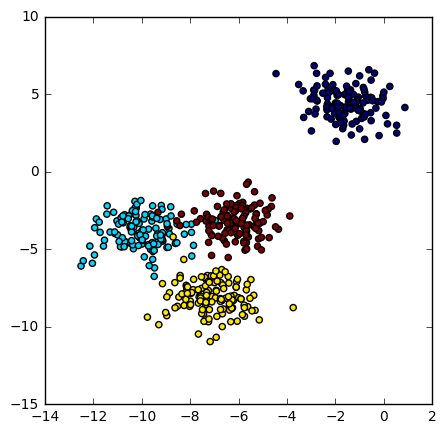

In [2]:
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
# Możemy przekształcić nasz zbiór zmiennych opisujących X1 i odpowiadających im klas y1 do jednej macierzy danych (pd.DataFrame)
columns = ['feature' + str(x) for x in np.arange(1, X1.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X1.T)}
d['label'] = y1
dane1 = pd.DataFrame(d).reindex(columns=columns+['label'])

# Wyświelenie
plt.figure(figsize=(5,5))
plt.scatter(dane1.feature1, dane1.feature2, marker='o', c=dane1.label)

Dane wygenerowane przez powyższy kod zostały zapamiętane w jednej macierzy danych posiadającej wartości atrybutów opisujących w kolumnach *feature1, feature_2* oraz kolumnie *label* z wartościa atrybutu opisywanego (decyzyjnego). Zbiór składa się z 500 obiektów należących do 4 klas. Powyższy zbiór danych zostanie wykorzystany do eksperymentów z metodami grupowania danych. Grupowanie będzie wykonywane jedynie dla atrybutów opisujących. W jego wyniku każdy obiekt zostanie przyporządkowany do pewnej grupy (klastra). Wygenerowany powyżej atrybut decyzyjny może zostać wykorzystany do oceny wyników grupowania. 

#### Zadanie 1.1 
Należy kilka razy wygenerować zbiór danych X2, y2 z *random_state* ustawionym na *None*.

### 1.2 Metoda k-średnich (k_means)
Metoda K-średnich została zaimplementowana w pakiecie *sklearn.cluster*. Metoda ta polega na minimalizacji sumy odległości wektorów wartości atrybutów obiektów należących do danego klastra do pewnego punktu charakterystycznego klastra (zwanego jego środkiem lub centroidem), do którego obiekty zostały przyporządkowane. Przyporządkowanie danego obiektu do klastra odbywa się poprzez porównanie jego odległości do wszystkich centroidów. Należy pamiętać, że metoda ta wymaga informacji o liczbie klastrów (grup). Początkowe ich położenia wybierane są losowo. 

Wykonajmy klasteryzację dla zbioru X1. Przyjmijmy ilość klastrów równą 5. Inicjalizacja pozycji startowej klastrów *random_state=0*.

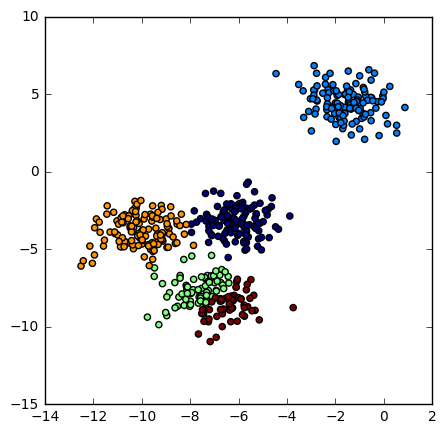

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(dane1[['feature1','feature2']])
etykiety_klastrow = kmeans.fit_predict(dane1[['feature1','feature2']])
plt.figure(figsize=(5,5))
plt.scatter(dane1.feature1, dane1.feature2, marker='o', c=etykiety_klastrow)

W efekcie działania algorytmu otrzymaliśmy ostateczne wartości centroidów naszych klastrów. Ich współrzędne możemy otrzymać przy pomocy poniższej komendy.

In [5]:
print "Współrzędne centroidów:"
print(kmeans.cluster_centers_)

Współrzędne centroidów:
[[ -6.07614617  -3.15491285]
 [ -1.54234022   4.43517599]
 [ -7.75528886  -7.53033886]
 [-10.04463109  -3.80372912]
 [ -6.34545657  -8.66014462]]


#### Zadanie 1.2 
Proszę wykonać grupowanie dla random_state=10 inna (wartość początkowych klastra). Proszę porównać otrzymany wykres z wcześniejszym wynikiem. Skąd wzięła się niestabilność algorytmu polegająca na istnieniu różnic w przyporządkowaniu obiektów do grup ?

### Dobór liczby klastrów

Oprócz braku stabilności, ważnym zagadnieniem związanym z algorytmem k-średnich jest dobór liczby klastrów. Z reguły nie jest ona znana, a algorytm wymaga jej do działania. Poniżej przedstawione zostały dwie metody ręcznego doboru ich liczby:
1. Metoda łokciowa - polegająca na iteracyjnym grupowaniu zbioru z rosnącą liczbą klastrów. Następnie wyświetlamy wykres sumy odległości punktów od środków centroidów w funkcji liczby klastrów. Wykres takiej funkcji będzie z początku bardzo szybko maleć by później zmniejszyć swój spadek i spokojnie dążyć do 0 (które osiągnie dla liczby klastrów równej liczbie obiektów w macierzy danych). Punkt w którym obserwowane jest zahamowanie spadku nazywamy punktem łokciowym, który określa optymalną ilość grup. 
2. Metoda sylwetki danych (data silhouette) - wykorzystująca tzw. sylwetkę danych jako miarę dopasowania obiektu do własnego klastra i do klastrów sąsiednich. Miarą sylwetki dla danej obserwacji $s(i)$ nazywamy $s(i)=\frac{b(i)-a(i)}{max\{a(i),b(i)\}}$, gdzie $b(i)$ jest odległością do centroidu najbliżeszgo klastra do którego nie została zaklasyfikowana, a $a(i)$ jest odległością od centroidu do którego została zaklasyfikowana. Liczba grup jest dobierana tak, by wartość średnia miary sylwetki była jak największa tj. jak najwięcej obiektów leżało jak najbliżej własciwych im centroidów. Miara sylwetki dla każdego punktu przyjmuje wartości: 
> * 1 dla punktu leżącego w wewnętrzynym obszarze klastra, 
> * 0 dla punktu leżącego na granicy klastrów, 
> * -1 dla punktu leżącego w wewnętrznym obszarze innego klastra. 


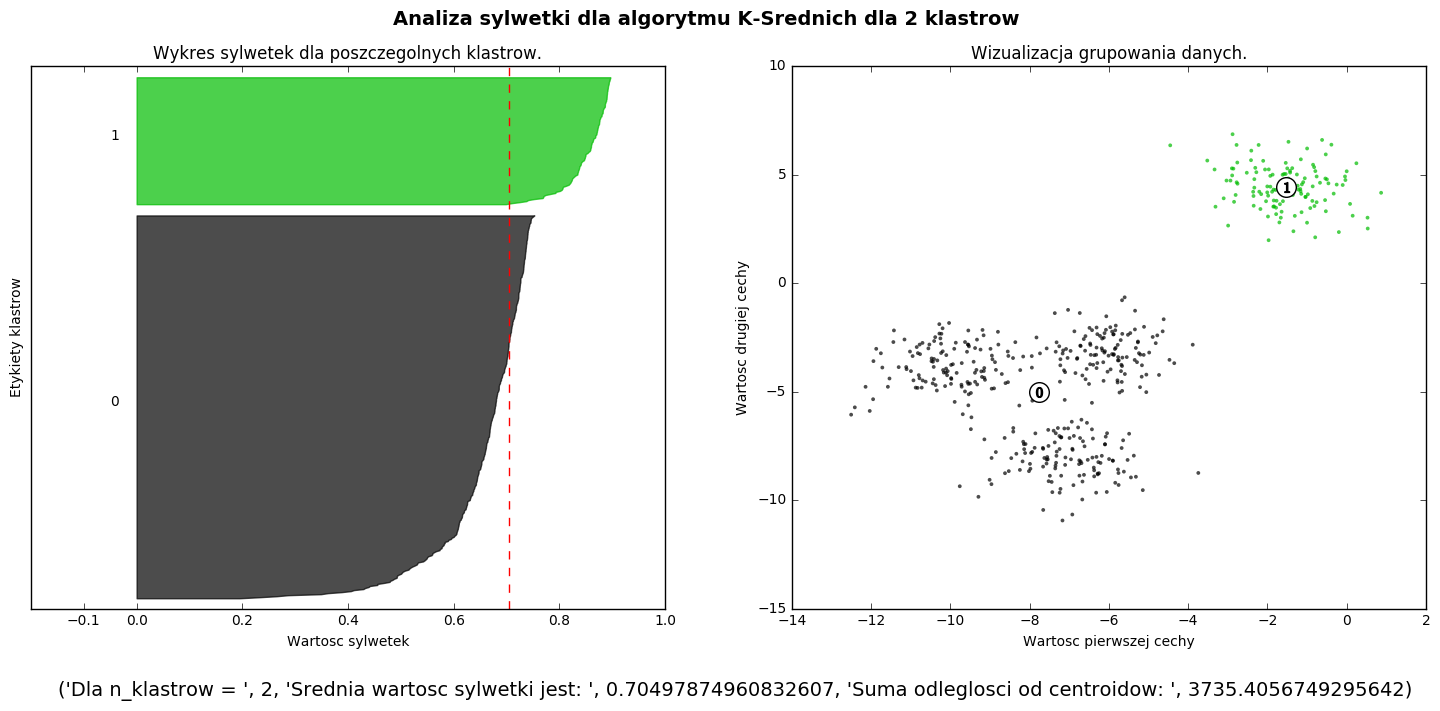

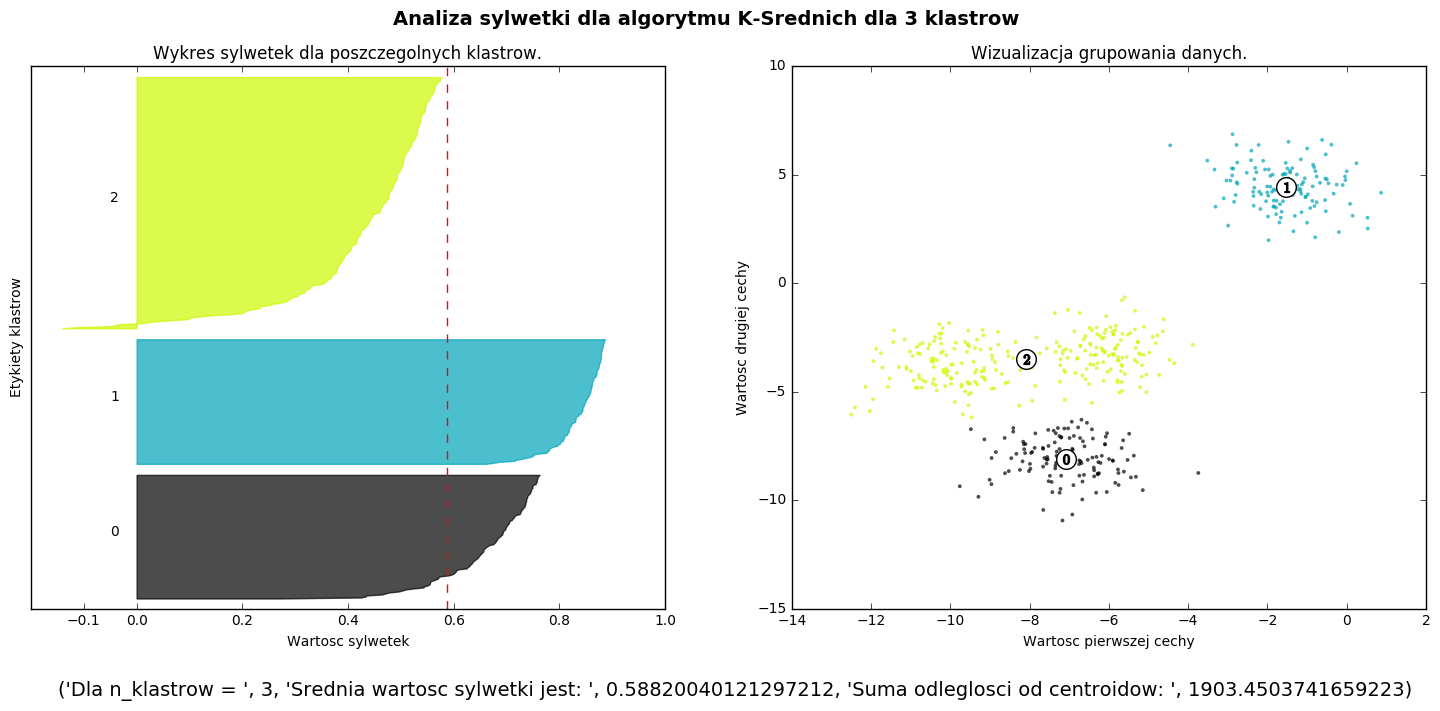

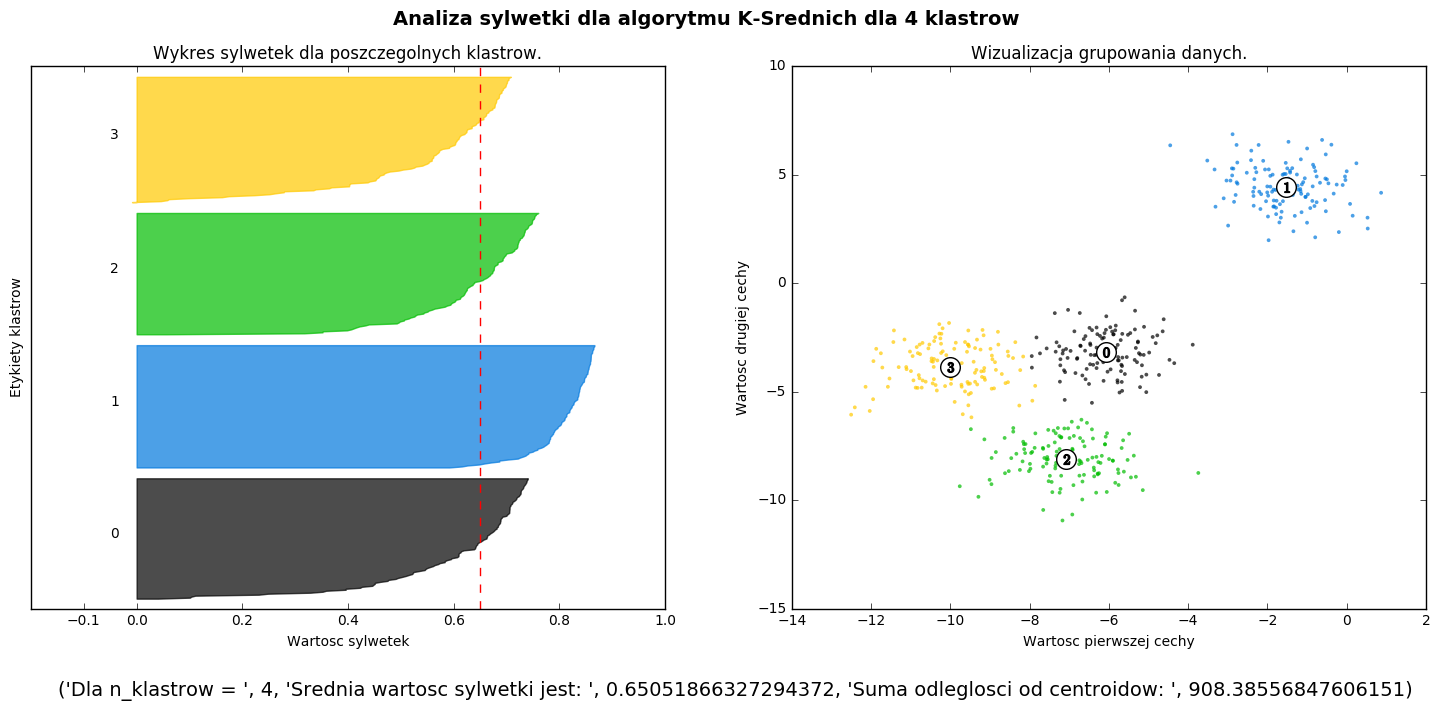

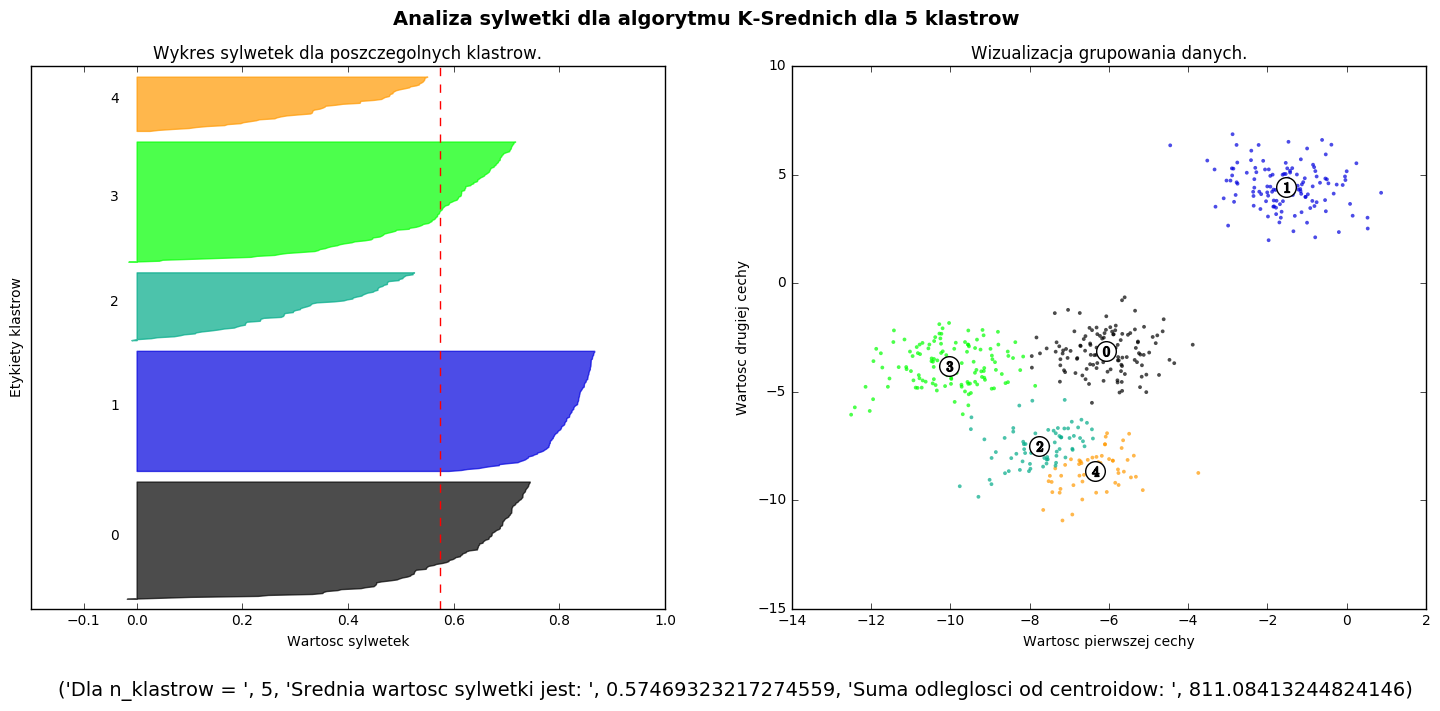

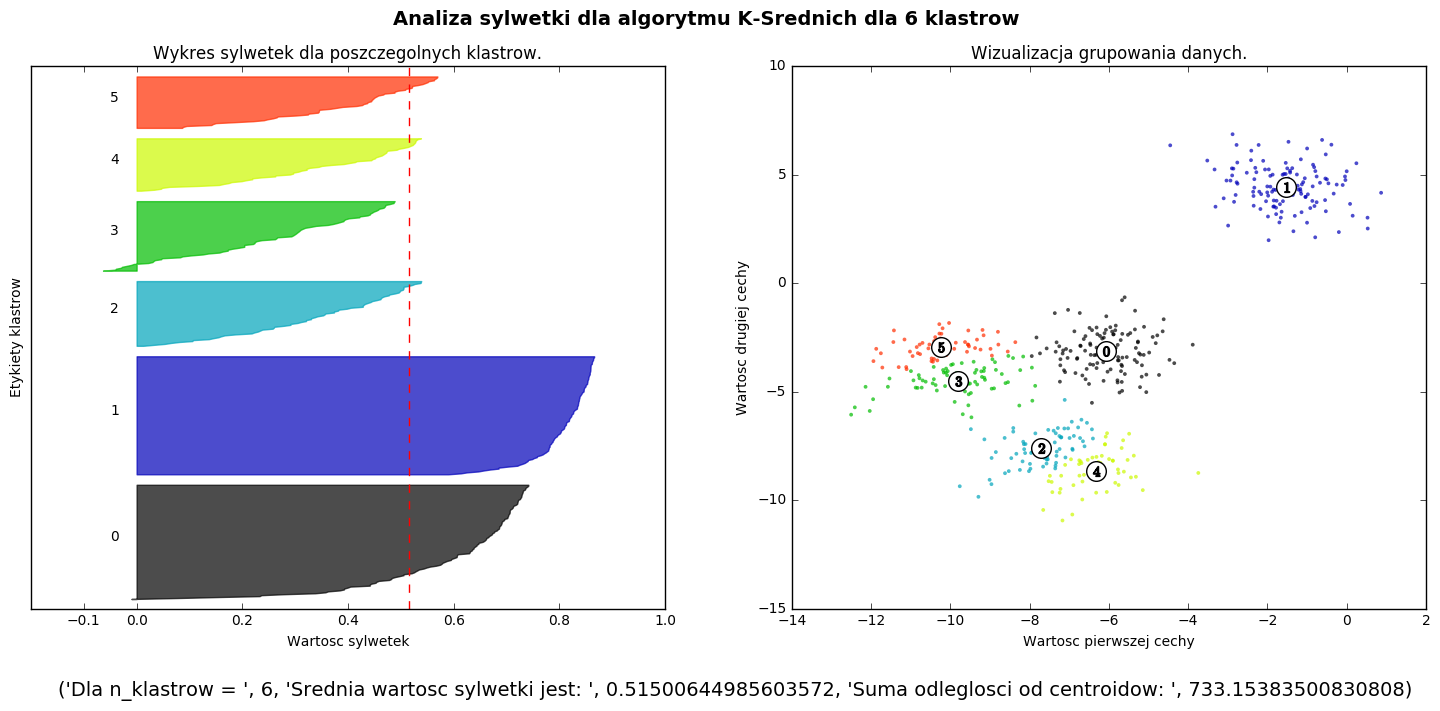

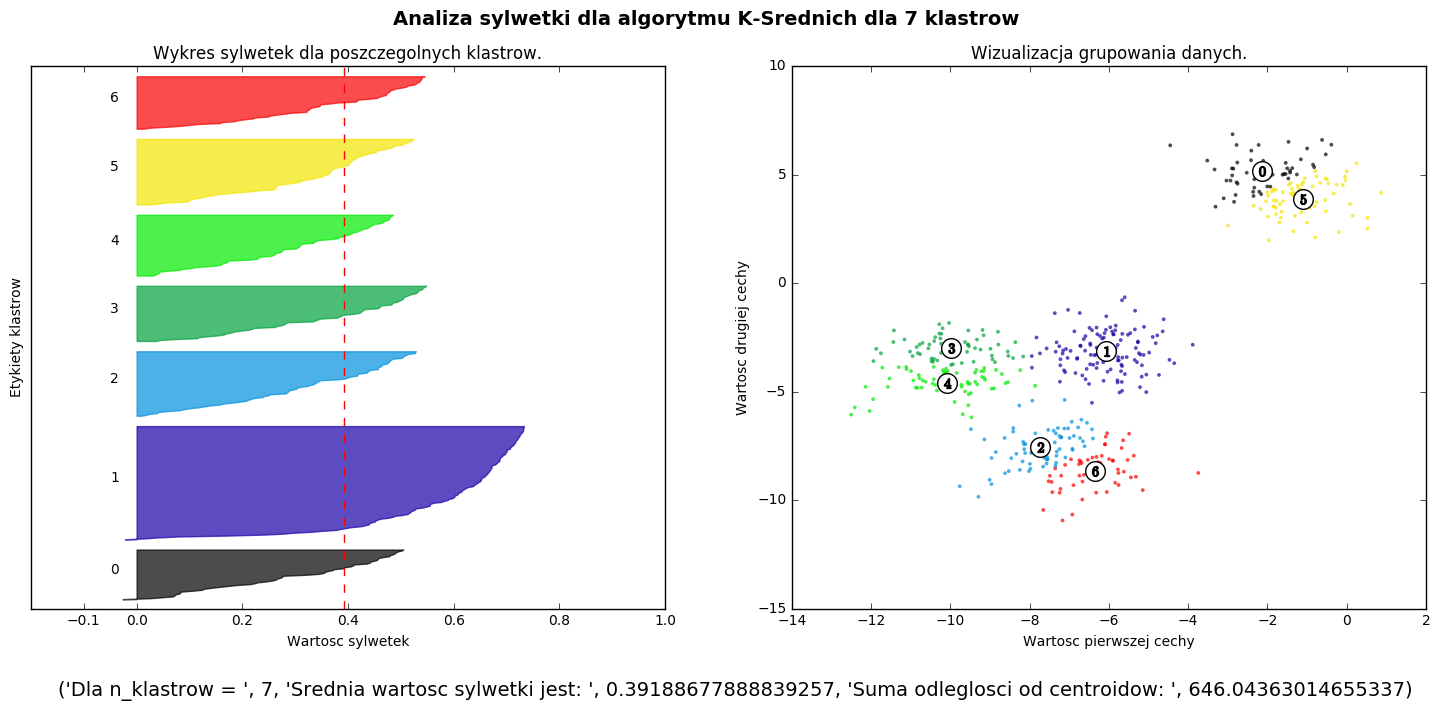

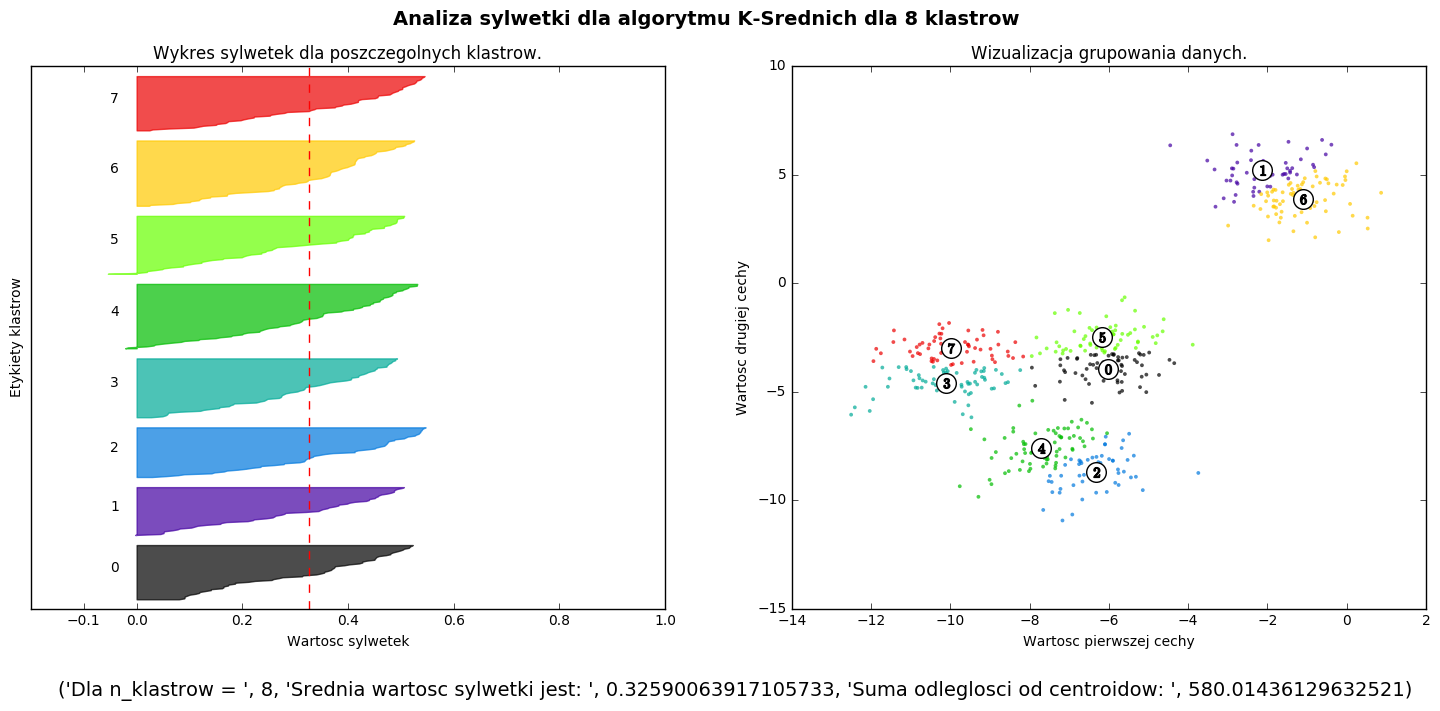

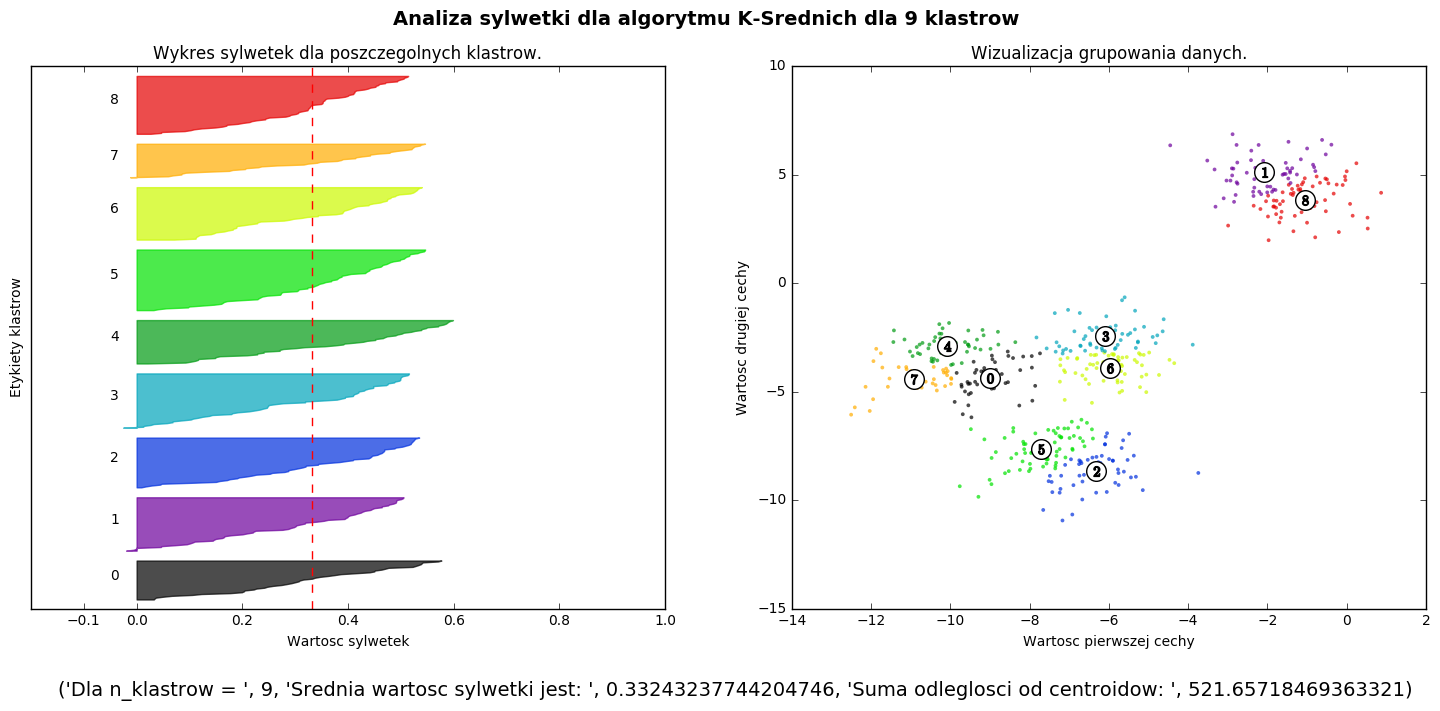

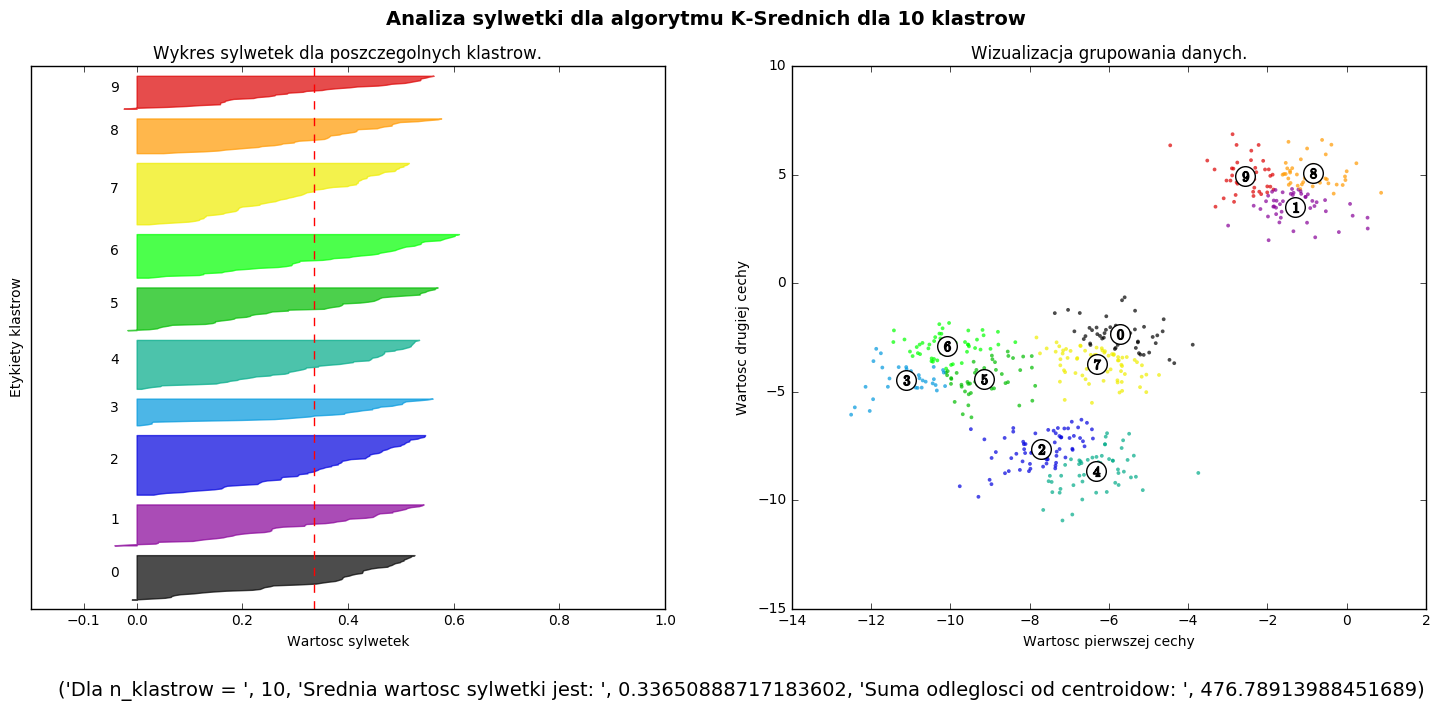

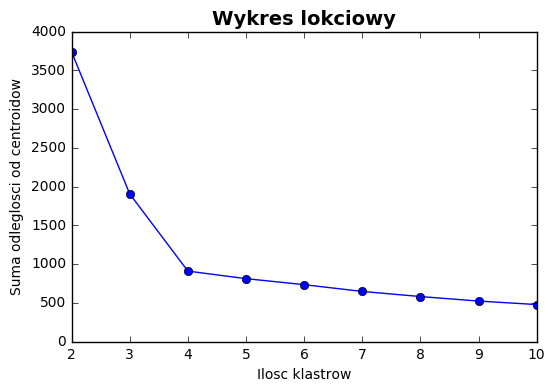

In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

score = pd.Series()

for n_cluster in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dane1) + (n_cluster + 1) * 10])
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(X1)
    score = score.append(pd.Series(kmeans.inertia_))
    cluster_labels = kmeans.fit_predict(dane1[['feature1','feature2']])
    
    silhouette_avg = silhouette_score(dane1[['feature1','feature2']], cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dane1[['feature1','feature2']], cluster_labels)
    
    y_lower = 10
    for i in range(n_cluster):
        # Zebranie wyników sylwetek do próbek należących do klastra i ich sortowanie
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etykieta sylwetek z numerami klastrów w środku
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Wyliczenie przesunięcia w pionie dla kolejnego wykresu
        y_lower = y_upper + 10  # 10 dla kolejnej próbki
        
    ax1.set_title("Wykres sylwetek dla poszczegolnych klastrow.")
    ax1.set_xlabel("Wartosc sylwetek")
    ax1.set_ylabel("Etykiety klastrow")

    # Wyrysowanie wartości średniej sylwetki 
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Wyczyszczenie etykiety osi Y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Drugi wykres będzie przedstawiał klastry
    colors = cm.spectral(cluster_labels.astype(float) / n_cluster)
    ax2.scatter(dane1.feature1, dane1.feature2, marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Etykietowanie klastrów
    centers = kmeans.cluster_centers_
    # Rysowanie białych kółek w cetroidach
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    # Numerowanie centroidów
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("Wizualizacja grupowania danych.")
    ax2.set_xlabel("Wartosc pierwszej cechy")
    ax2.set_ylabel("Wartosc drugiej cechy")

    plt.suptitle(("Analiza sylwetki dla algorytmu K-Srednich "
                  "dla %d klastrow" % n_cluster),
                 fontsize=14, fontweight='bold')
    plt.figtext(0.14, 0, 
                ("Dla n_klastrow = ", n_cluster,
                 "Srednia wartosc sylwetki jest: ", silhouette_avg,  
                 "Suma odleglosci od centroidow: ", kmeans.inertia_), fontsize=14)
    plt.show()
    

plt.plot(range_n_clusters, score,'bo-')
plt.title("Wykres lokciowy", fontsize=14, fontweight='bold')
plt.xlabel("Ilosc klastrow")
plt.ylabel("Suma odleglosci od centroidow")

### 1.3 Grupowanie hierarchiczne
Grupowanie hierarchiczne (HCA) polega na łączeniu w klastry obiektów najbardziej do siebie podobnych przy pomocy przyjętej metryki. Wyróżnia się dwa podejścia do budowania hierachii klastrów:
1. Aglomeracyjne - polegająca na budowaniu drzewa od dołu do góry. Początkowo każdy obiekt stanowi odrębną grupę. Następnie następuje łączenie grup. W każdej iteracji dwie najbliższe grupy są łączone w jedną, większą. 
2. Rozdzielające - polegająca na na budowaniu drzewa od góry do dołu. Najpierw wszystkie próbki uważane są za jedną grupę, po czym jest ona dzielnona na mniejsze grupy, aż do otrzymania liczby grup równej liczbie obiektów.
Kolejność łączenia grup jest odwzorowana w strukturze drzewiastej zwanej dendrogramem. 

Dendrogram można zbudować i wyświetlić przy pomocy pakietu *scipy*. 

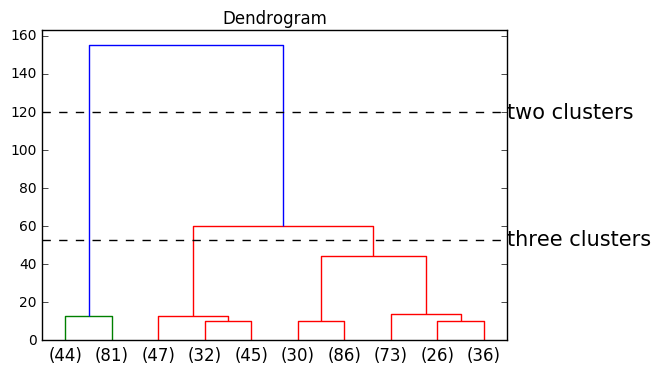

In [6]:
from scipy.cluster.hierarchy import dendrogram, ward
#from sklearn.cluster import ward_tree

linkage_array = ward(dane1[['feature1','feature2']])
dendrogram(linkage_array, p=10, truncate_mode='lastp')

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [120, 120], '--',c='k')
ax.plot(bounds, [53,53],'--',c='k')
ax.text(bounds[1],120, 'two clusters', va='center', fontdict={'size':15})
ax.text(bounds[1],53, 'three clusters', va='center', fontdict={'size':15})
plt.title('Dendrogram')


Następnie zobaczymy jak wygląda wynik naszej klasteryzacji hierarchicznej dla różnych metod łączenia próbek i zbioru X1.

Poniżej wyświetlone zostało porównanie wyniku klastrowania hierarchicznego da 2,4,6 i 10 klastrów dla 3 różnych kryteriów łączenia klastrów (linkage):
* average - wykorzystuje średnią odległość między wszystkimi obserwacjami w obu klastrach
* complete - wykorzystuje maksymalną odległość między wszystkimi obserwacjami obu zbiorów
* ward - minimalizuje wariancję między łączonymi klastrami

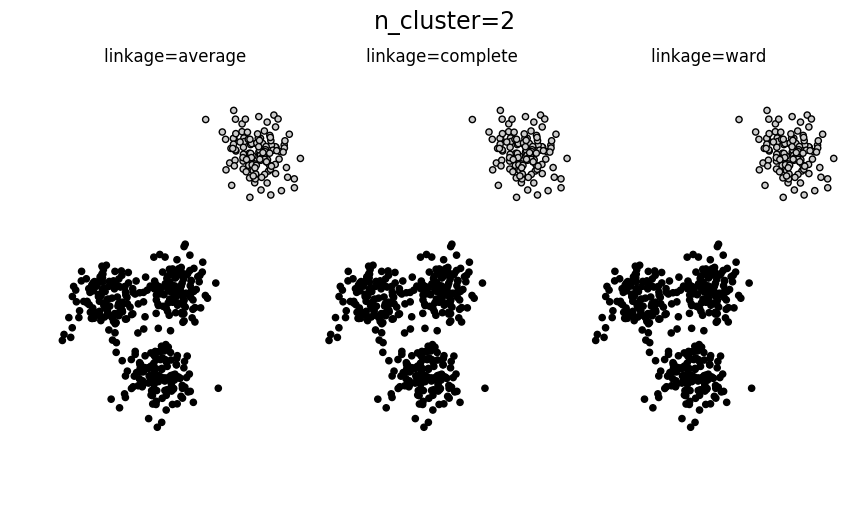

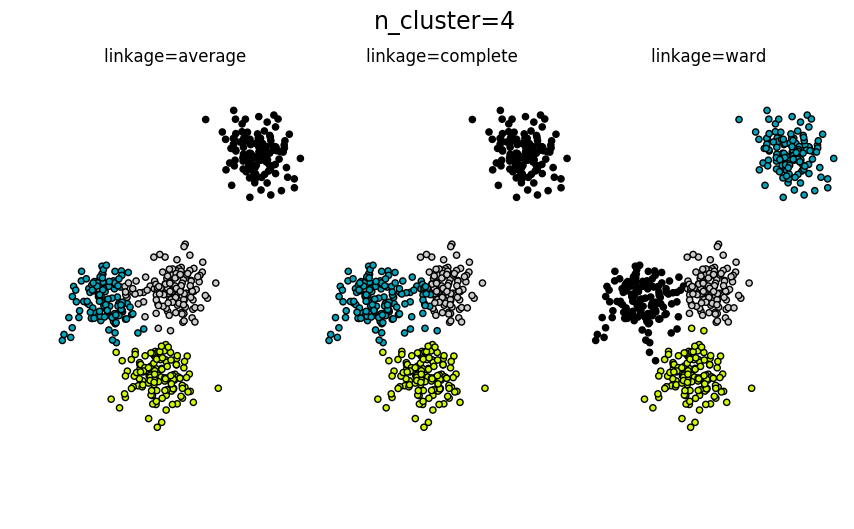

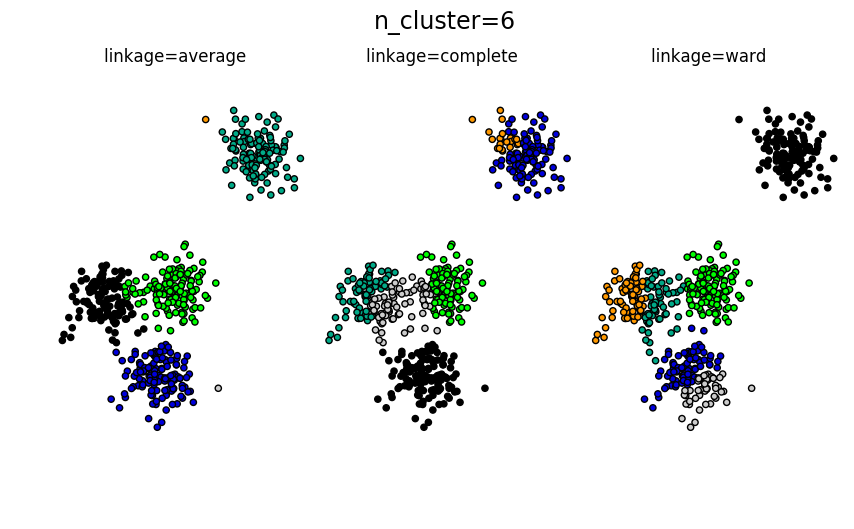

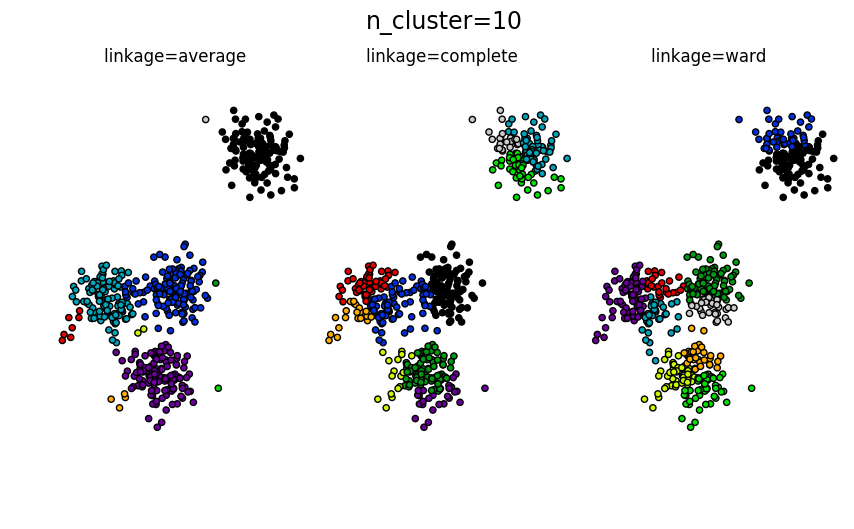

In [7]:
from sklearn.cluster import AgglomerativeClustering

for n_cluster in (2,4,6,10):
    plt.figure(figsize=(8, 5))
    for index, linkage in enumerate(('average', 'complete', 'ward')):
        plt.subplot(1, 3, index + 1)
        model = AgglomerativeClustering(linkage=linkage,
                                        n_clusters=n_cluster)
        model.fit(dane1[['feature1','feature2']])
        plt.scatter(dane1.feature1, dane1.feature2, c=model.labels_, cmap=plt.cm.spectral)
        plt.title('linkage=%s ' % linkage, fontdict=dict(verticalalignment='top'))
        plt.axis('equal')
        plt.axis('off')

        plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
        plt.suptitle('n_cluster=%i' % n_cluster, size=17)

#### Zadanie 1.3 
Wykonaj grupowanie danych dla atrybutów opisujących zbioru 'iris', oraz dowolnie wybranych kilku zbiorów 'md' używanych w pierwszej części instrukcji. Jak możemy porównać wyniki grupowania i wartości atrybutu decyzyjnego ? Co wynika z takiego porównania ?

## 2 Klasyfikacja

Klasyfikacja zalicza się do metod uczenia nadzorowanego (ang. supervised learning). Zbiór (macierz) danych w tym przypadku składa się z obiektów charakteryzujących się atrybutami opisującymi i atrybutem decyzyjnym. Przyjmuje się przy tym, że pomiędzy atrybutami opisującymi, a atrybutem decyzyjnym zachodzi pewien związek przyczynowo-skutkowy zaś kategoryczny atrybut decyzyjny określa klasę do której przynależy obiekt. Zbiór danych jest traktowany jako źródło wiedzy na podstawie którego określa się rodzaj klasyfikatora, a następnie dobiera jego parametry w tzw. procesie uczenia. Gotowy klasyfikator może następnie zostać wykorzystany do określenia przynależności obiektu dla którego znane są jedynie wartości atrybutów opisujących do właściwej klasy. 

Z reguły w celu sprawdzenia poprawności danego algorytmu i sprawdzenia jego skuteczności dla danego zadania klasyfikacji podział zbioru danych wykonywany jest na zbiór uczący i testowy (najczęściej w proporcjach 80/20 lub 70/30). Czasem jednak w przypadku testowania algorytmów i ich dostrajania stosuje się podział 60/20/20, a poszczególne części stanową zbiory odpowiednio: treningowy, walidacyjny i testowy. 

W rozdziale tym skupimy się na następujących metodach klasyfikacji:
1. Metoda najbliżego sąsiada (k-NN)
2. Naiwnym klasyfikatorze Bayesa
3. SVM
4. Drzewach decyzyjnych

Na końcu zaprezentowane zostaną metody łączenia wyników różnych klasyfikatorów (tzw. ensemblingu), w celu poprawy jakości klasyfikacji.


### 2.1 Metoda najbliżego sąsiada (k-NN)

Zasadą działania tej metody jest poszukiwanie najbliższego sąsiada/sąsiadów dla obiektu o nieznanej klasie, wśród obiektów znajdujących się w zbiorze uczącym. Następnie, na podstawie znanych wartości atrybutów decyzyjnych najbliższych sąsiadów określana jest klasa, do której przyporządkowywany jest rozpatrywany obiekt. Najczęściej stosowanymi metrykami odległości są odległość Euklidesowa (w przypadku atrybutów ilościowych) lub Hamminga (w przypadku atrybutów kategorycznych). 

Funkcja *NearestNeighbors* tworzy kolejkę najbliższych sąsiadów. Parametr *n_neighbors* mówi o długości kolejki, w związku z czym jeśli dla każdej próbki chcemy znaleźć jednego sąsiada należy ten parametr ustawić na **2**. 

Pierwszy przykład pokazuje poszukiwania najbliższych sąsiadów w obrębie tego samego zbioru obiektów. Dla każdego obiektu wyszukiwany jest obiekt jemu najbliższy. 

In [8]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree')
nbrs.fit(dane1[['feature1','feature2']])
distances, indices = nbrs.kneighbors(dane1[['feature1','feature2']])

In [9]:
nbrs_wynik = pd.DataFrame({'Prob_1': indices[:,0],
                           'Prob_2': indices[:,1],
                           'Prob_3': indices[:,2],
                           'Odlegosc_Prob1_od_1_sasiada': distances[:,1],
                           'Odlegosc_Prob1_od_2_sasiada': distances[:,2]}, 
                            columns=['Prob_1','Prob_2','Prob_3','Odlegosc_Prob1_od_1_sasiada','Odlegosc_Prob1_od_2_sasiada'])
nbrs_wynik

,Prob_1,Prob_2,Prob_3,Odlegosc_Prob1_od_1_sasiada,Odlegosc_Prob1_od_2_sasiada
0,0,408,330,0.370149,0.736636
1,1,478,91,0.361196,0.500261
2,2,157,41,0.131368,0.153918
3,3,31,273,0.205228,0.257950
4,4,14,287,0.272953,0.284336
5,5,468,229,0.441018,0.502551
6,6,431,206,0.295944,0.360969
7,7,274,43,0.582766,0.669931
8,8,396,16,0.315700,0.532264
9,9,453,119,0.113561,0.217566


#### Zadanie 2.1
Proszę sprawdzić, czy jeśli próbka s2 z Prob_2 jest najbliższym sąsiadem odpowiedniej próbki s1 z Prob_1, to czy próbka s1 będzie najbliższym sąsiadem próbki s2.

#### Zadanie 2.2
Następnie sprawdźmy ilośc klas naszego zbioru 1 (macierz y1). Do tego celu użyj funkcję *np.unique*

Następnie podzielimy nasz zbiór na dane treningowe i testowe.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dane1.iloc[:,0:2], dane1.label, test_size=0.2, random_state=1)
print 'Dlugosc X_train: ', len(X_train)
print 'Dlugosc X_test: ', len(X_test)
print 'Dlugosc y_train: ', len(y_train)
print 'Dlugosc y_test: ', len(y_test)

Dlugosc X_train:  400
Dlugosc X_test:  100
Dlugosc y_train:  400
Dlugosc y_test:  100


Następnie nauczymy klasyfikator najbliższego sąsiada przy pomocy danych treningowych. Do tego celu wykorzystamy funkcję *KNeighborsClassifier*. W jej przypadku parametr *n_neighbors* określa illość sąsiadów. 

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model_1nn = KNeighborsClassifier(n_neighbors=1, algorithm='auto')
model_1nn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Wykonajmy predykcję dla zbioru X_test:

In [13]:
y_pred = model_1nn.predict(X_test)

In [14]:
model_1nn.predict(X_test)

array([2, 2, 3, 3, 0, 1, 0, 0, 1, 0, 0, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 3, 2,
       3, 3, 2, 3, 0, 2, 1, 2, 1, 1, 3, 0, 2, 2, 3, 3, 1, 0, 1, 0, 2, 2, 2,
       0, 2, 2, 0, 0, 3, 0, 3, 3, 3, 3, 1, 2, 2, 0, 1, 3, 3, 1, 0, 0, 3, 2,
       1, 0, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 2, 0, 2, 3, 3, 0, 2, 2, 0, 2,
       0, 3, 3, 2, 2, 1, 2, 3])

#### Zadanie 2.3

W jaki sposób możemy wyznaczyć jakość (skuteczność) klasyfikacji ? Napisz stosowny program. 

Wygenerujemy teraz nowy zbiór z klastrami bardziej się nakładającymi

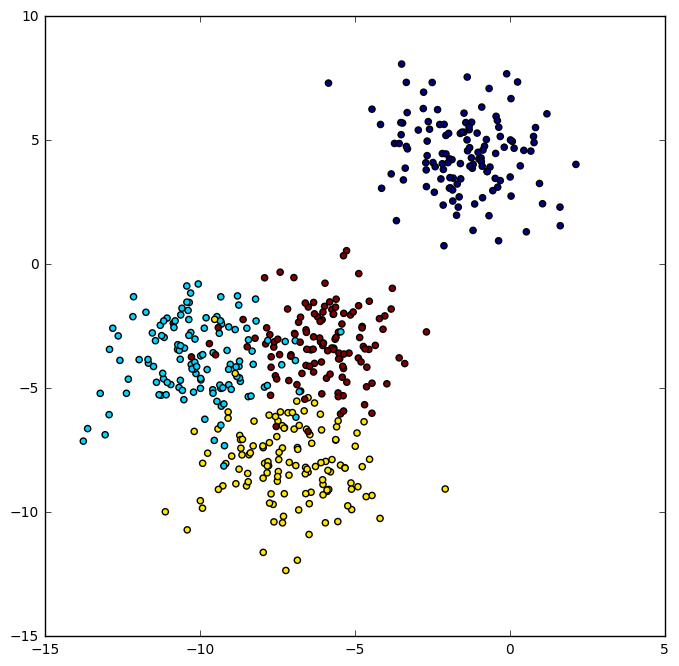

In [15]:
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

Wyświetlimy teraz obszary dezycyjności w zależności od ilości sąsiadów

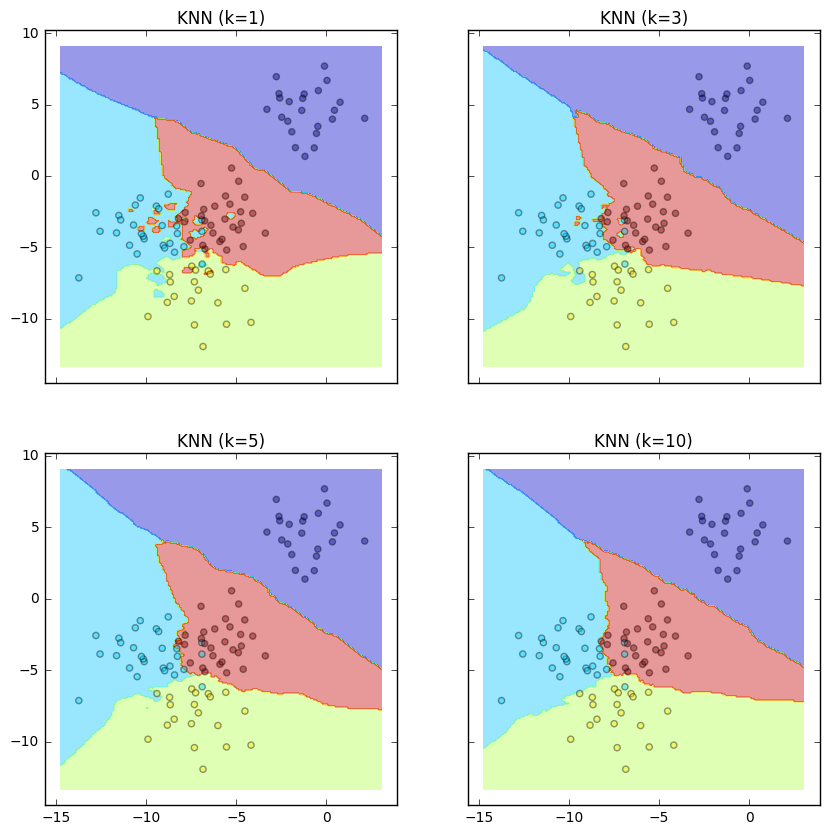

In [16]:
from itertools import product
cechy = ['feature1','feature2']

from sklearn.neighbors import KNeighborsClassifier
model_1nn = KNeighborsClassifier(n_neighbors=1)
model_1nn.fit(dane3[cechy], dane3.label)
model_3nn = KNeighborsClassifier(n_neighbors=3)
model_3nn.fit(dane3[cechy], dane3.label)
model_5nn = KNeighborsClassifier(n_neighbors=5)
model_5nn.fit(dane3[cechy], dane3.label)
model_10nn = KNeighborsClassifier(n_neighbors=10)
model_10nn.fit(dane3[cechy], dane3.label)



# Wyświetlenie obszarów decyzyjności
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 10))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [model_1nn, model_3nn, model_5nn, model_10nn],
                        ['KNN (k=1)', 'KNN (k=3)',
                         'KNN (k=5)', 'KNN (k=10)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(dane3.iloc[0:100, 0], dane3.iloc[0:100, 1], c=dane3.label[0:100], alpha=0.4)
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 2.2 Dobór ilości sąsiadów
W celu doboru właściwej ilości sąsiadów należy wykonać analizę błędu klasyfikacji dla różnych wartości sąsiadów.

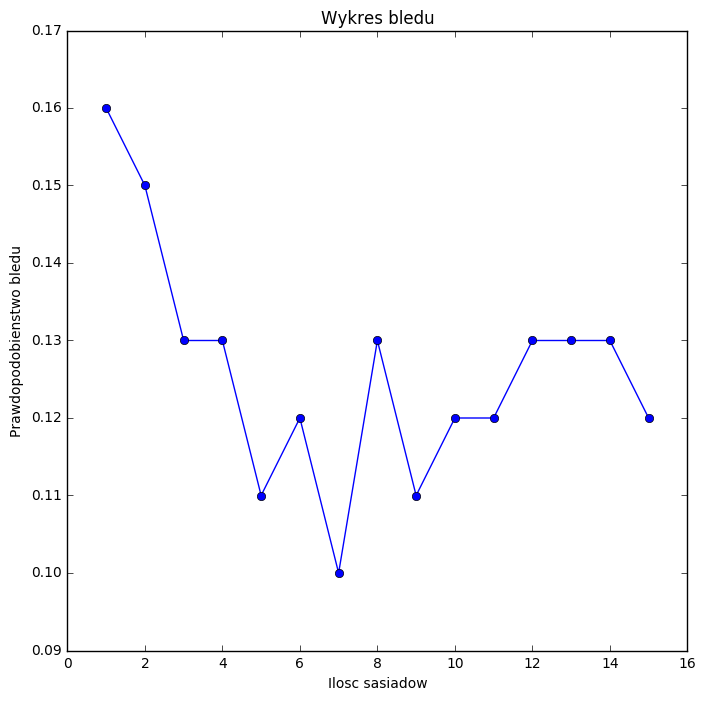

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(dane3[cechy], dane3['label'], test_size=0.2, random_state=1)

kvals = range(1, 16)
rss_all = np.zeros(15)
for k in kvals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X3_train,y3_train)
    predictions = model.predict(X3_test)
    rss_all[k-1] = 1-model.score(X3_test,y3_test)
plt.figure(figsize=(8,8))
plt.plot(kvals, rss_all,'bo-')
plt.title('Wykres bledu')
plt.xlabel('Ilosc sasiadow')
plt.ylabel('Prawdopodobienstwo bledu')

#### Zadanie 2.4 
Korzystając z powyższego wykresu, ilu sąsiadów należy użyć do modelu?

Poniżej zaprezentowany został sposób automatycznego doboru liczby sąsiadów przy pomocy metody n-krotnej walidacji krzyżowej.

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

nKrotnosc = 5
numNeighbors  = np.arange(2,20)
param_grid    = dict(n_neighbors=numNeighbors)
grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=nKrotnosc)
grid.fit(dane3[cechy],dane3['label']) # W tym wypadku używamy całego zbioru. 
                # Funkcja sama dokonuje wielokrotnego 
                # podziału na zbiór uczący i testowy.
print "Najlepszy parametr: ", grid.best_params_
print "Średni błąd klasyfikacji dla najlepszego parametru: ", 1-grid.best_score_

Najlepszy parametr:  {'n_neighbors': 12}
Średni błąd klasyfikacji dla najlepszego parametru:  0.062


#### Zadanie 2.5
Następnie przy pomocy zbioru treningowym X3 należy nauczyć model dla parametru wybranego w poprzednim zadaniu. Po nauczeniu należy dokonać predykcji wyników dla zbioru testowego X3. Następnie wyświetlony zostanie raport klasyfikacji. W raporcie tym otrzymujemy 3 podstawowe miary: prezycję (ang. precision), czułość (ang. recall) i miarę $f_1 = 2*\frac{precyzja * czułość}{precyzja+czułość}$. 

* Precyzja jest miarą wskazującą z jaką pewnością możemy ufać przewidywaniom pozytywnym: $precyzja = \frac{TP}{TP+FP}$  


* Czułość jest miarą wskazującą w jakim procencie klasa faktycznie pozytywna została pokryta przewidywaniem pozytywnym: $czułość = \frac{TP}{TP+FN}$ 

Dodatkowo wyświetlimy macierz pewności prezentującą, do której klasy zostały zaklasyfikowane obserwacje danych klas.

In [ ]:
# Uczenie najlepszego modelu (12-sąsiadów) na zbiorze treningowym X3:


# Dokonanie predykcji dla zbioru X3_test:
knn_prediction = knn_model.predict(X3_test) 
# Wyświetlenie raportu klasyfikacji oraz macierzy pewności:
from sklearn import metrics
print("Raport klasyfikacji: ")
print(metrics.classification_report(y3_test, knn_prediction))
print("Macierz pewnosci: ")
print(metrics.confusion_matrix(y3_test, knn_prediction))

### 2.3 Naiwny klasyfikator Bayesa

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
y_pred = gnb.fit(X3_train, y3_train).predict(X3_test)
# Podsumowanie wyuczenia modelu
print "Błąd klasyfikacji:", 1-gnb.score(X3_test,y3_test)
print("Raport klasyfikacji: ")
print(metrics.classification_report(y3_test, y_pred))
print("Macierz pewnosci: ")
print(metrics.confusion_matrix(y3_test, y_pred))

Błąd klasyfikacji: 0.13
Raport klasyfikacji: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        22
          1       0.65      0.85      0.73        13
          2       0.87      0.90      0.89        30
          3       0.90      0.77      0.83        35

avg / total       0.88      0.87      0.87       100

Macierz pewnosci: 
[[22  0  0  0]
 [ 0 11  0  2]
 [ 0  2 27  1]
 [ 0  4  4 27]]


In [21]:
y_pred

array([2, 2, 3, 3, 0, 1, 0, 0, 1, 0, 0, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 2,
       3, 3, 2, 3, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 3, 1, 0, 1, 0, 2, 2, 2,
       0, 2, 2, 0, 0, 3, 0, 3, 3, 1, 2, 1, 2, 2, 0, 1, 1, 3, 1, 0, 0, 3, 2,
       1, 0, 2, 3, 3, 0, 3, 1, 3, 3, 2, 3, 3, 2, 0, 3, 3, 3, 0, 2, 2, 0, 2,
       0, 3, 3, 2, 2, 1, 2, 3])

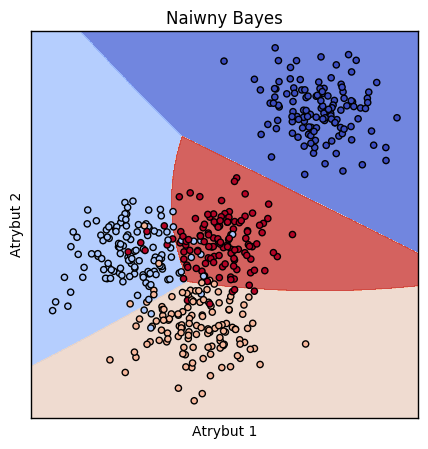

In [86]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
#titles = ['Naiwny Bayes']

plt.figure(figsize=(5,5))
#for i, clf in enumerate(gnb):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    #plt.subplot(1, 1, i + 1)
    #plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3['label'], cmap=plt.cm.coolwarm)
plt.xlabel('Atrybut 1')
plt.ylabel('Atrybut 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Naiwny Bayes')

plt.show()

#### Zadanie 2.5
Porównaj otrzymane wyniki z modelem kNN dla 12 sąsiadów

### 2.4 SVM
Metoda wektorów nośnych/SVM z ang. Support Vector Machine jest algorytmem, którego zadaniem jest podzielenie przestrzeni cech przy pomocy wektorów nośnych. W przypadku 2 cech, które można zobrazować na wykresie płaskim, jest są to po proste (w przypadku jądra liniowego) lub wielomiany lub funkcja Gaussa (w przypadku jąder nieliniowych). Jądra liniowe są szybkie i proste w użyciu, jednakże nadają się do klasyfikacji obszarów wyraźnie od siebie odstających. W celu dokładnego wyodrębnienia obszarów należy użyć jąder nieliniowych, uważając na przeuczenie klasyfikatora.   

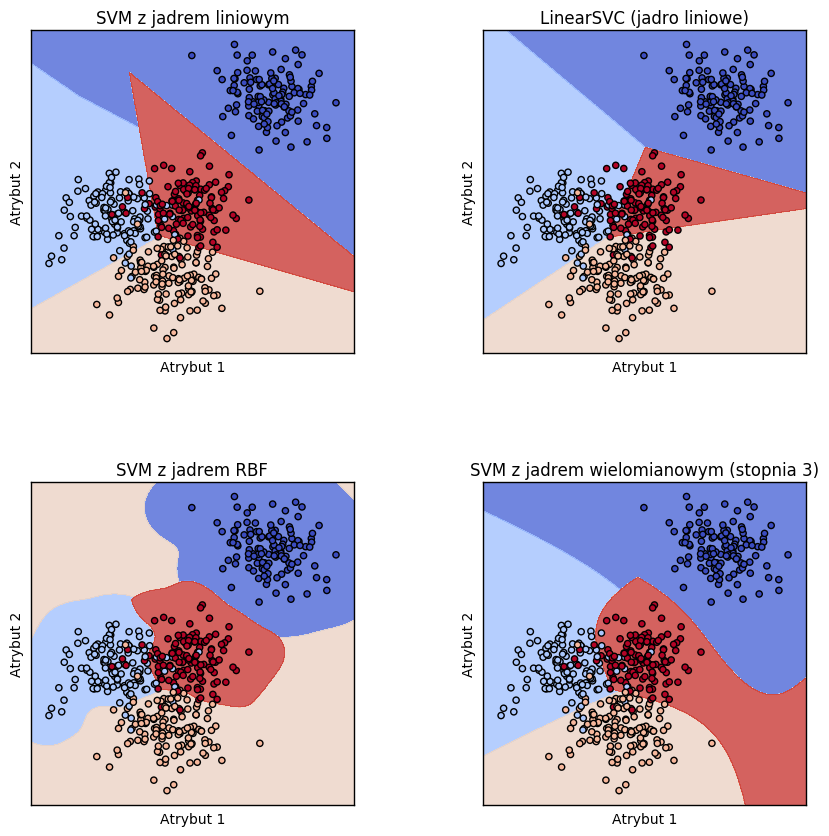

In [23]:
from sklearn import svm
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(dane3[cechy], dane3['label'])
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(dane3[cechy], dane3['label'])
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(dane3[cechy], dane3['label'])
lin_svc = svm.LinearSVC(C=C).fit(dane3[cechy], dane3['label'])

# create a mesh to plot in
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVM z jadrem liniowym',
          'LinearSVC (jadro liniowe)',
          'SVM z jadrem RBF',
          'SVM z jadrem wielomianowym (stopnia 3)']

plt.figure(figsize=(10,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### 2.5 Drzewa decyzyjne
Drzewa decyzyjne są jednymi z najpopularniejszych klasyfikatorów. Posiadają jednak pewne ograniczenie. Do procesu uczenia wymagają symetrycznego rozkładu klas. W przypadku dużej liczności zbiorów, ze zbioru uczącego wybieramy klasę najmniej liczną i z pozostałych próbek losujemy tyle samo próbek uczących. W przypadku małej liczności najmniejszych klas, możemy je posklejać w celu nauczenia klasyfikatora wyszukiwania najliczniejszych klas, a następnie używamy kolejnego drzewa, do rozdzielenia sklejonego zbioru. 

W przypadku drzew decyzyjnych złożoność modelu określana jest poprzez głębokość drzew. W rozdziale tym przeanalizujemy obszary klasyfikacji w zależności od głębokości drzewa decyzyjnego.

In [24]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth=4)
y_pred = tree_model.fit(X3_train, y3_train).predict(X3_test)
print "Błąd klasyfikacji:", 1-tree_model.score(X3_test,y3_test)
print "Prawdopodobieństwo przynależności do klasy: "
print (tree_model.predict_proba(X3_test))

Błąd klasyfikacji: 0.12
Prawdopodobieństwo przynależności do klasy: 
[[ 0.          0.16666667  0.83333333  0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.06741573  0.          0.93258427]
 [ 0.          0.06741573  0.          0.93258427]
 [ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [ 1.          0.          0.          0.        ]
 [ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [ 1.          0.          0.          0.        ]
 [ 1.          0.          0.          0.        ]
 [ 0.          0.06741573  0.          0.93258427]
 [ 0.          0.06741573  0.          0.93258427]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.16666667  0.66666667  0.16666667]
 [ 0.          0.06741573  0.          0.93258427]
 [ 0.        

In [25]:
#należy doinstalować pakiet graphviz
with open("drzewo.dot", 'w') as f:
    f = tree.export_graphviz(tree_model, out_file=f)
# dot -Tpdf drzewo.dot -o drzewo.pdf

Wykres przestrzeni decyzyjnej dla drzew o różnej głębokości

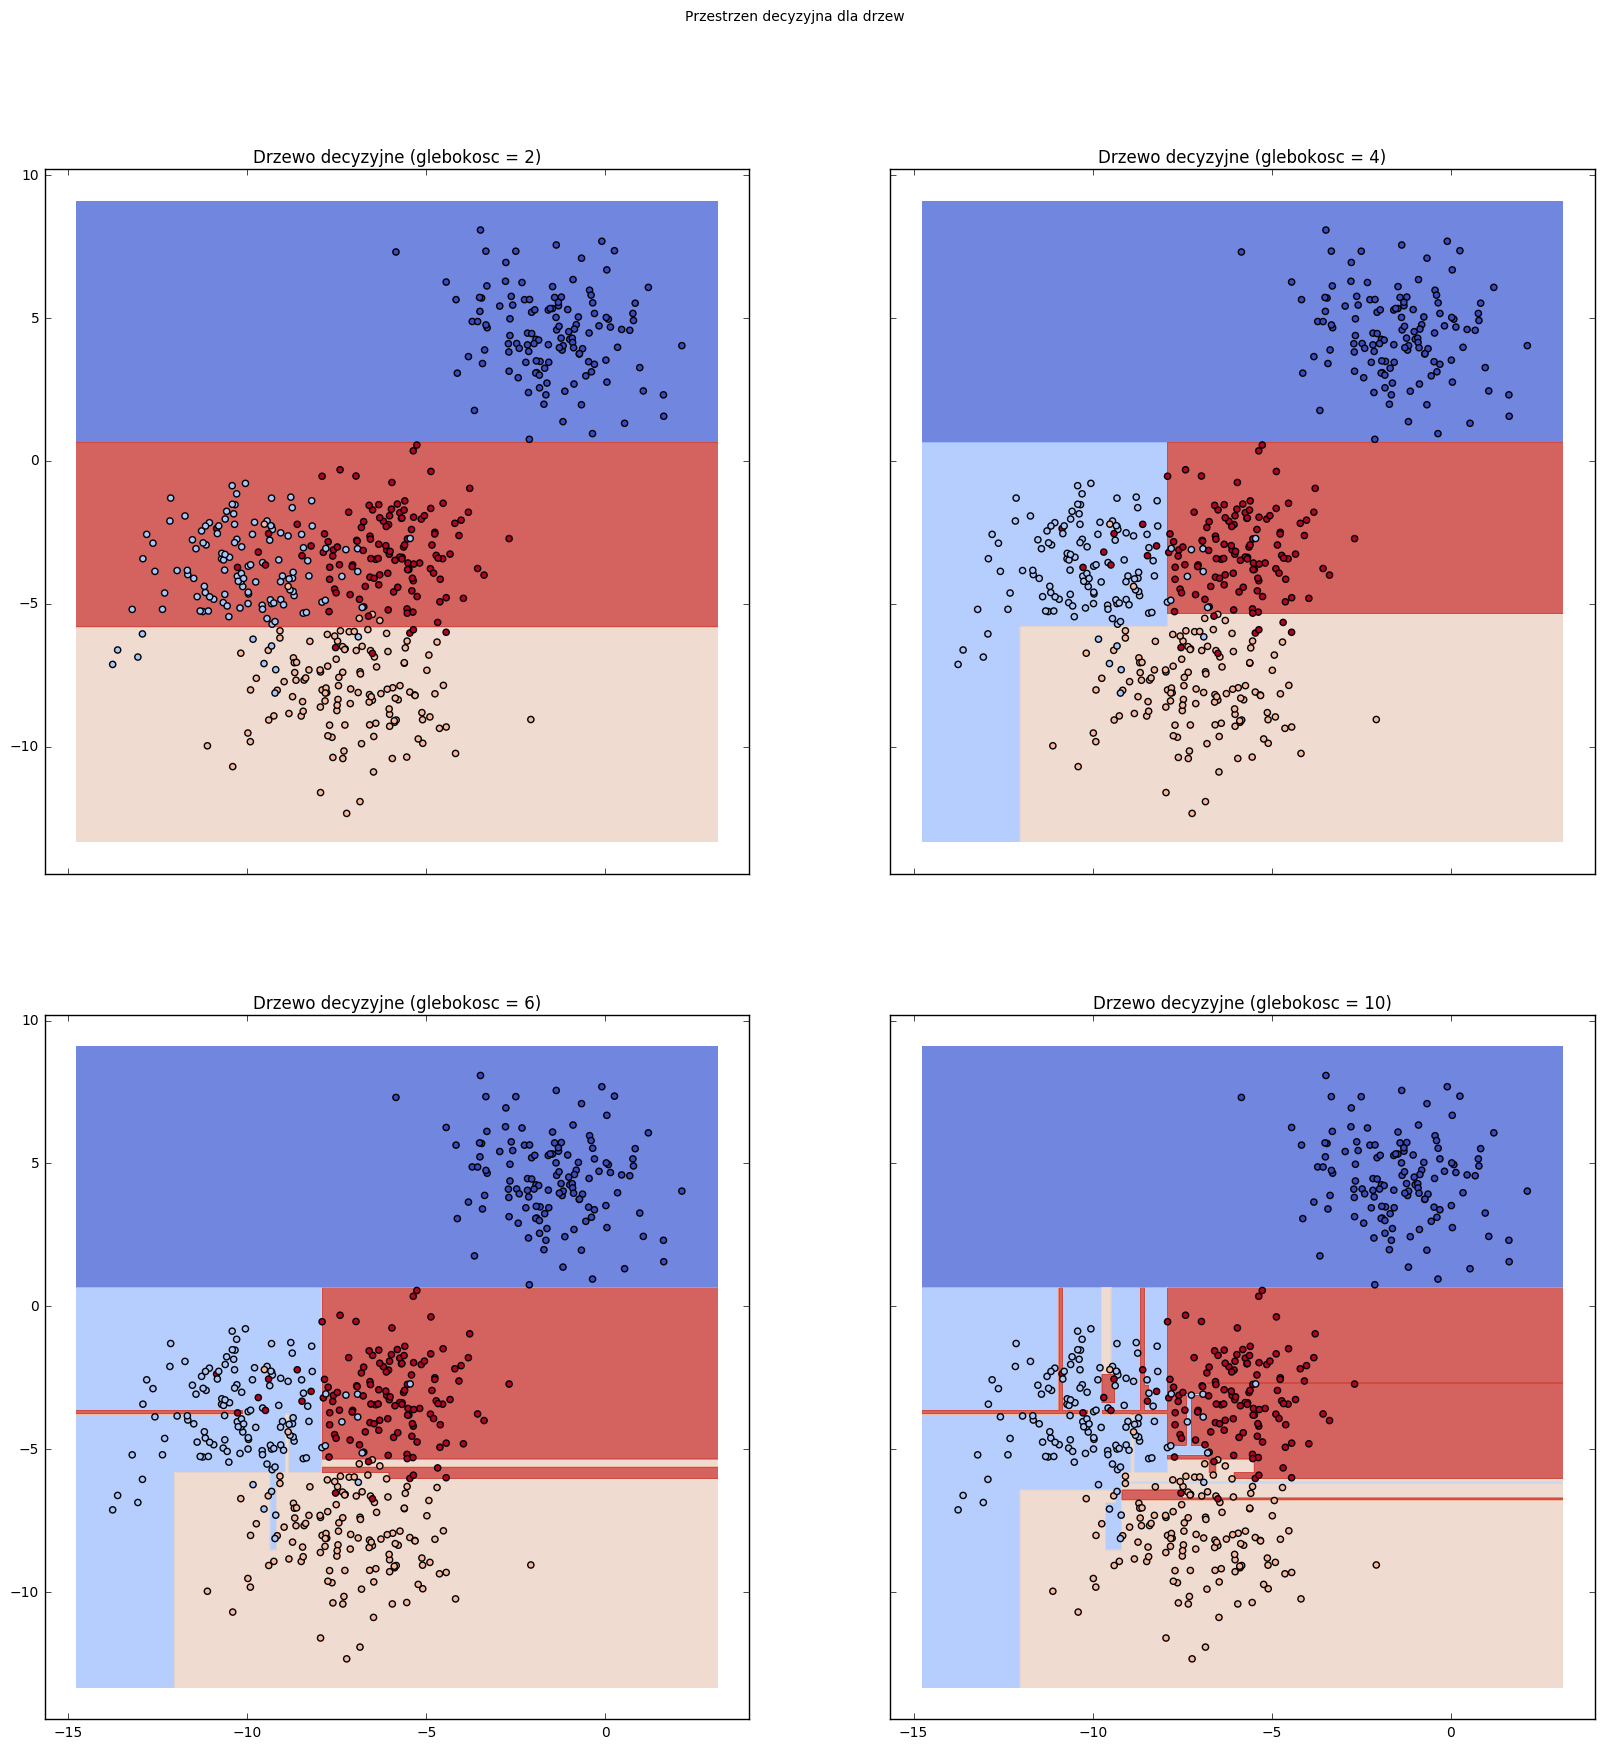

In [26]:
# Plot the decision boundary

tree_model_2 = tree.DecisionTreeClassifier(max_depth=2)
tree_model_2.fit(dane3[cechy],dane3['label'])
tree_model_4 = tree.DecisionTreeClassifier(max_depth=4)
tree_model_4.fit(dane3[cechy],dane3['label'])
tree_model_6 = tree.DecisionTreeClassifier(max_depth=6)
tree_model_6.fit(dane3[cechy],dane3['label'])
tree_model_10 = tree.DecisionTreeClassifier(max_depth=10)
tree_model_10.fit(dane3[cechy],dane3['label'])



# Parameters
n_classes = 4
plot_step = 0.02

x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(20, 20))

for pairidx, clf, tt in zip(product([0, 1], [0, 1]),
                        [tree_model_2, tree_model_4, tree_model_6, tree_model_10],
                        ['Drzewo decyzyjne (glebokosc = 2)', 'Drzewo decyzyjne (glebokosc = 4)',
                         'Drzewo decyzyjne (glebokosc = 6)', 'Drzewo decyzyjne (glebokosc = 10)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[pairidx[0], pairidx[1]].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    axarr[pairidx[0], pairidx[1]].scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3['label'], cmap=plt.cm.coolwarm)
    axarr[pairidx[0], pairidx[1]].set_title(tt)
    plt.axis("tight")

plt.suptitle("Przestrzen decyzyjna dla drzew")
#plt.legend()
plt.show()

## 3 Składanie klasyfikatrów - model ensemble
Składanie klasyfikatorów jest powszechnie stosowanym podejściem uczenia maszynowego. Założeniem jest wykorzystanie wielu algorytmów uczenia w celu poprawienia ich możliwości uogólnienia/odporności w stosunku do pojednyczego modelu.

Są 3 podstawowe rodzaje składania modeli:
1. **Bagging** (Bootstrap Aggregation) - metoda ta polega na podziale zbioru treningowego na podzbiory danych. Dla każdego podzbioru buduje się klasyfikator. Następnie wyniki klasyfikacji dla danej próbki łączone są przy pomocy średniej lub większości głosowań. Bagging pozwala na zmiejszenie błędu wariancji.
2. **Boosting** - polega na sekwencyjnym uczeniu klasyfikatorów. Pierwszy klasyfikator uczony jest na całym zbiorze danych treningowych, a następny zbiór treningowy jest zbiorem wyników otrzymanych z poprzedniego klasyfikatora. Boosting posiada lepszą zdolność prognozowania od Baggingu ale posiada tendencję do nadmiernego dopasowania danych treningowych. Dwa najbardziej znane algoytmy to AdaBoost i Gradient Boost.
3. **Kombinacja modeli: Voting i Stacking** - polega na pracy w dwóch fazach. W pierwszej fazie wykorzystujemy wiele klasyfikatorów do przewidywania klasy. Następnie w przypadku *Votingu* dokonuje się głosowania przy nad klasą wynikową poprzez wybranie najczęściej występującej klasy *hard voting* albo przy użyciu prawdopodobieństwa wyniku lub poprzez zwiększenie pewność danego modelu *soft voting*. W przypadku *stacking* wykorzystuje się kolejny klasyfikator do łączenia poszczególnych modeli w celu zmniejszenia błędu generalizacji. 

W przypadku łączenia modeli możemy wykorzystać kombinację tych samych algorytmów uczenia maszynowego ale łączenie rezultaów generowanych przez różne algorytmy daje lepsze przewidywania. Na przykad połączenie lasów losowych (połącznie drzew decyzyjnych), KNN-a i naiwnego Bayesa działa lepiej niż połączenie ze sobą trzech modeli lasów losowych. Kluczem do stworzenia potężnego zestawu modeli jest ich różnorodność. 

### 3.1 Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)

In [30]:
from sklearn.datasets import make_blobs
X4, y4 = make_blobs(n_samples=1000,
                  n_features=4,
                  centers=4,
                  cluster_std=[5,4,3.5,5],
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X4.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X4.T)}


d['label'] = y4
dane4 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyciągnięcie nazw kolumn ze zmiennymi objaśniającymi (cechami) 
cechy = dane4.columns.values
cechy = np.delete(cechy,-1)

from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(dane4[cechy], dane4['label'], test_size=0.2, random_state=1)

bagging.fit(X4_train,y4_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [31]:
# Dokonanie predykcji dla zbioru X4_test:
bagging_prediction = bagging.predict(X4_test) 
# Wyświetlenie raportu klasyfikacji oraz macierzy pewności:
from sklearn import metrics
print "Błąd klasyfikacji:", 1-bagging.score(X4_test,y4_test)
print("Raport klasyfikacji: ")
print(metrics.classification_report(y4_test, bagging_prediction))
print("Macierz pewnosci: ")
print(metrics.confusion_matrix(y4_test, bagging_prediction))


Błąd klasyfikacji: 0.295
Raport klasyfikacji: 
             precision    recall  f1-score   support

          0       0.64      0.51      0.57        55
          1       0.83      0.83      0.83        41
          2       0.72      0.88      0.79        50
          3       0.65      0.65      0.65        54

avg / total       0.70      0.70      0.70       200

Macierz pewnosci: 
[[28  3  8 16]
 [ 4 34  3  0]
 [ 2  1 44  3]
 [10  3  6 35]]


In [32]:
C = 1.0  # SVM parametr regularyzacji
svc = svm.SVC(kernel='linear', C=C).fit(X4_train, y4_train)
svc_prediction = svc.predict(X4_test)
from sklearn import metrics
print "Błąd klasyfikacji:", 1-svc.score(X4_test,y4_test)
print("Raport klasyfikacji: ")
print(metrics.classification_report(y4_test, svc_prediction))
print("Macierz pewnosci: ")
print(metrics.confusion_matrix(y4_test, svc_prediction))

Błąd klasyfikacji: 0.21
Raport klasyfikacji: 
             precision    recall  f1-score   support

          0       0.78      0.71      0.74        55
          1       0.88      0.88      0.88        41
          2       0.87      0.82      0.85        50
          3       0.68      0.78      0.72        54

avg / total       0.80      0.79      0.79       200

Macierz pewnosci: 
[[39  2  2 12]
 [ 2 36  2  1]
 [ 1  1 41  7]
 [ 8  2  2 42]]


### 3.2 Boosting

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

#Inicjalizacja modelu klasyfikatora Ada Boost
ada_boost_model = AdaBoostClassifier(n_estimators=100)
# Wyliczenie wartości błędu przy pomocy walidacji krzyżowej
scores = cross_val_score(clf, dane4[cechy], dane4.label, cv=5)
print "Średnia wartość błędu: ", 1-scores.mean() 


Średnia wartość błędu:  0.279


In [34]:
# Uczenie modelu przy pomocy zbioru treningowego X4 
ada_boost_model.fit(X4_train, y4_train)
ada_boost_model_prediction = ada_boost_model.predict(X4_test)
print "Błąd klasyfikacji:", 1-ada_boost_model.score(X4_test,y4_test)
print("Raport klasyfikacji: ")
print(metrics.classification_report(y4_test, ada_boost_model_prediction))
print("Macierz pewnosci: ")
print(metrics.confusion_matrix(y4_test, ada_boost_model_prediction))

Błąd klasyfikacji: 0.4
Raport klasyfikacji: 
             precision    recall  f1-score   support

          0       0.55      0.69      0.61        55
          1       0.71      0.59      0.64        41
          2       0.83      0.30      0.44        50
          3       0.54      0.80      0.65        54

avg / total       0.65      0.60      0.58       200

Macierz pewnosci: 
[[38  3  0 14]
 [13 24  3  1]
 [11  3 15 21]
 [ 7  4  0 43]]


### 3.3 Voting
Do opracowania ensembla posłużymy się trzema klasyfikatorami:
1. Liniowym SVM-em
2. Drzewem decyzyjnym o głębokości 2
3. Naiwnym Bayesem
Nasz klasyfikator będzie klasyfikatorem głosującym z opcją 'hard'. Wybrana zostania klasa która będzie miała przewagę głosów.

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Inicjalizacja 3 klasyfikatorów
clf1 = svm.LinearSVC(C=1)
clf2 = DecisionTreeClassifier(max_depth=2,random_state=1)
clf3 = GaussianNB()
#Inicjalizacja klasyfikatora głosującego (z opcją hard)
eclf = VotingClassifier(estimators=[('svm', clf1), ('dt', clf2), ('gnb', clf3)], voting='hard')

# Walidacja krzyżowa
for clf, label in zip([clf1, clf2, clf3, eclf], ['Linear SVM', 'Drzewo Decyzyjne', 'Naiwny Bayes', 'Ensemble']):
    scores = cross_val_score(clf, dane4[cechy], dane4['label'], cv=5, scoring='accuracy')
    print("Skuteczność: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Skuteczność: 0.81 (+/- 0.03) [Linear SVM]
Skuteczność: 0.60 (+/- 0.04) [Drzewo Decyzyjne]
Skuteczność: 0.82 (+/- 0.02) [Naiwny Bayes]
Skuteczność: 0.81 (+/- 0.02) [Ensemble]


Drugą opcją jest klasyfikator głosujący z opcją 'soft'. Wtedy do opracowania ensembla należy wykorzystać klasyfikatory, które są w stanie polczyć prawdopodobieństwo przynależności do danej klasy. Następnie klasyfikator określa przynależną klasę biorąc pod uwagę poszczególne prawdopodobieństwa. Opcjonalnie można dołożyć wagi, które same będą wzmacniać wyniki otrzymane przez dane klasyfikatory.

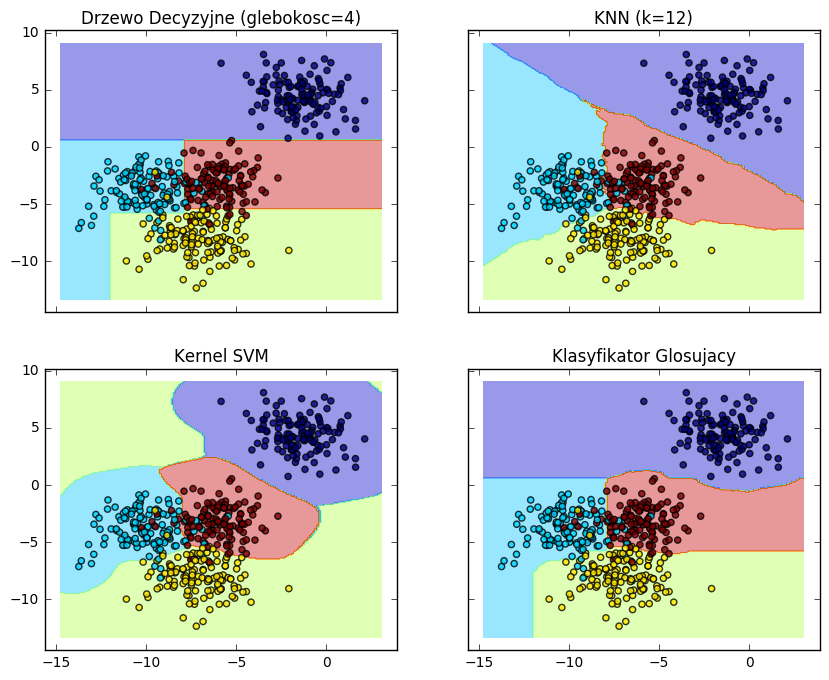

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Inicjalizacja klasyfikatorów
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=12)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[2,1,2])

clf1 = clf1.fit(X3,y3)
clf2 = clf2.fit(X3,y3)
clf3 = clf3.fit(X3,y3)
eclf = eclf.fit(X3,y3)

# Wyrysowanie obszarow decyzyjnych
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Drzewo Decyzyjne (glebokosc=4)', 'KNN (k=12)',
                         'Kernel SVM', 'Klasyfikator Glosujacy']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3['label'], alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 4 Analiza danych Wesbrook
Dane dotycząc darczyńców będących absolwentami uczelni (UBC). Składają się z 2770 rekordów. Zadaniem jest opracowanie modelu mentalnego opierającego się na założeniu, że istnieją czynniki określające czy dana osoba przekaże uniwersytetowi 1000 dolarów lub więcej w ciągu jednego roku, w szczególności, w jaki sposób pozytywnie ktoś spogląda na UBC w oparciu o jego / jej osobiste doświadczenia z uniwersytet oraz na jej / jego możliwości do wpłacenia dużej darowizny w ciągu jednego roku.   
### Opis zmiennych 
0.      ATHLTCS - Udział w lekkoatletyce 
1.     AVE_INC - Średni przychód gospodarstwa domowego w regionie EA rezydenta
2.     BIGBLOCK - Uczestnik Big Block
3.        CHILD - Dziecko studenta UBC lub absolwent
4.     CNDN_PCT - % kanadyjczyków w regionie
5.        DEPT1 - Kod wydziału 
6.     DWEL_VAL - Średnia wartość mieszkań w regionie EA rezydenta
7.           EA - kod ID regionu
8.      ENG_PCT - % udziału domów angielskojęzycznych w regionie EA
9.     FACSTAFF - Kierunek na UBC lub członek kadry 
10.    FACULTY1 - Kierunek 1-szego stopnia na UBC
11.    FRSTYEAR - Rok ukończenia pierwszego kierunku na UBC
12.     GRADYR1 - Rok ukończenia UBC 1-szego stopnia
13.     HH_1PER - % gospodarstw 1 osobowych w EA
14.     HH_2PER - % gospodarstw 2 osobowych w EA
15.     HH_3PER - % gospodarstw 3 osobowych w EA
16.    HH_45PER - % gospodarstw 4 i 5 osobowych w EA
17.          ID - ID
18.     INDUPDT - Data ostatniej zmiany danych osobowych
19.      MAJOR1 - Stopień naukowy
20.     MARITAL - Stan cywilny
21.    MOV_DWEL - % przyjezdnych mieszkańców w regionie EA
22.    OTHERACT - Uczestnik innych aktywności
23.     OWN_PCT - % gospodarst domowych posiadająych własne mieszkanie w regionie EA
24.      PARENT - Rodzic studenta lub absolwentem UBC
25.        PROV - Dwuliterowy kod prowincji
26.      SD_INC - odchylenie standardowe przychodów w gospodarstwach domowych w danym regionie
27.         SEX - płeć
28.      SPOUSE - małżonek studenta lub absolwenta UBC
29.    TOTLGIVE - łączne dofinansowanie
30.    WESBROOK - czy daje dotacje 



In [37]:
# Wczytanie danych z pliku dbf
import pysal as ps
import numpy as np
import pandas as pd
dbf_link = "Wesbrook.dbf"
dbf = ps.open(dbf_link)
d = {col: dbf.by_col(col) for col in dbf.header}
dane = pd.DataFrame(d)
dbf.close()

In [38]:
pd.set_option('display.max_columns', 31)
pd.set_option('display.width', 1000)
dane

,ATHLTCS,AVE_INC,BIGBLOCK,CHILD,CNDN_PCT,DEPT1,DWEL_VAL,EA,ENG_PCT,FACSTAFF,FACULTY1,FRSTYEAR,GRADYR1,HH_1PER,HH_2PER,HH_3PER,HH_45PER,ID,INDUPDT,MAJOR1,MARITAL,MOV_DWEL,OTHERACT,OWN_PCT,PARENT,PROV,SD_INC,SEX,SPOUSE,TOTLGIVE,WESBROOK
0,Y,147196.0,N,Y,0.775000,CO,1153369.0,59030052.0,0.673640,N,CO,1960.0,1960.0,0.169014,0.281690,0.112676,0.323944,88,10/02/1995,      ,M,0.000000,N,0.785714,Y,BC,529293.835900,M,Y,24728,Y
1,N,151728.0,N,N,0.859649,PO,1667488.0,59030113.0,0.807018,N,PO,1988.0,1988.0,0.066667,0.266667,0.200000,0.233333,152,07/21/1997,      ,M,0.000000,N,0.870968,N,BC,215856.359230,M,Y,23500,Y
2,Y,162558.0,N,N,0.922481,AP,1153646.0,59030201.0,0.821705,N,AP,1949.0,1949.0,0.389831,0.372881,0.101695,0.067797,157,08/22/1994,CIVL,M,0.000000,Y,0.280702,Y,BC,919876.363330,M,Y,3000,Y
3,N,45609.0,N,N,0.800000,     ,232647.0,59028017.0,0.777778,N,        ,NaN,NaN,0.564706,0.317647,0.070588,0.047059,158,12/21/1996,      ,M,0.000000,N,0.364706,N,BC,83574.130447,M,Y,7600,Y
4,N,147196.0,N,Y,0.775000,LA,1153369.0,59030052.0,0.673640,N,LA,1958.0,1958.0,0.169014,0.281690,0.112676,0.323944,159,05/07/1997,      ,M,0.000000,N,0.785714,Y,BC,529293.835900,M,Y,20000,Y
5,N,44348.0,N,N,0.868217,     ,667492.0,59030056.0,0.838462,N,        ,NaN,NaN,0.587500,0.325000,0.050000,0.037500,160,04/27/1993,      ,W,0.000000,N,0.197531,Y,BC,64815.309997,M,N,7829,Y
6,N,152304.0,N,N,0.859649,     ,1148184.0,59028160.0,0.850877,N,        ,NaN,NaN,0.086957,0.318841,0.144928,0.391304,169,12/08/1994,      ,M,0.000000,N,0.857143,N,BC,317544.106420,M,Y,2476,Y
7,N,NaN,N,Y,0.954545,PO,1090805.0,59002613.0,0.954545,N,PO,1993.0,1993.0,0.142857,0.642857,0.214286,0.000000,206,07/21/1997,      ,M,0.000000,N,0.750000,Y,BC,NaN,M,Y,5000,Y
8,N,181812.0,N,Y,0.845850,AR,1074646.0,59030053.0,0.728346,N,AR,1937.0,1937.0,0.030303,0.196970,0.181818,0.500000,209,07/17/1992,      ,M,0.000000,N,0.911765,Y,BC,408204.657620,M,Y,13611,Y
9,N,118694.0,N,N,0.870466,PO,1117838.0,59030202.0,0.725389,N,PO,1949.0,1990.0,0.175439,0.245614,0.087719,0.403509,218,09/22/1997,      ,M,0.000000,N,0.745763,Y,BC,465818.472260,M,Y,6858,Y


In [39]:
# Wielkość zbioru (DataFrame Size)
dane.shape

(2770, 31)

In [40]:
# Wyświetlenie typów zmiennych
dane.dtypes

ATHLTCS      object
AVE_INC     float64
BIGBLOCK     object
CHILD        object
CNDN_PCT    float64
DEPT1        object
DWEL_VAL    float64
EA          float64
ENG_PCT     float64
FACSTAFF     object
FACULTY1     object
FRSTYEAR    float64
GRADYR1     float64
HH_1PER     float64
HH_2PER     float64
HH_3PER     float64
HH_45PER    float64
ID            int64
INDUPDT      object
MAJOR1       object
MARITAL      object
MOV_DWEL    float64
OTHERACT     object
OWN_PCT     float64
PARENT       object
PROV         object
SD_INC      float64
SEX          object
SPOUSE       object
TOTLGIVE      int64
WESBROOK     object
dtype: object

In [41]:
dane.corr(method='pearson', min_periods=1)

,AVE_INC,CNDN_PCT,DWEL_VAL,EA,ENG_PCT,FRSTYEAR,GRADYR1,HH_1PER,HH_2PER,HH_3PER,HH_45PER,ID,MOV_DWEL,OWN_PCT,SD_INC,TOTLGIVE
AVE_INC,1.000000,0.013290,0.669388,-0.063739,0.113765,-0.183080,-0.179221,-0.444896,-0.052856,0.178507,0.408318,-0.145492,-0.080953,0.482535,0.803654,0.079721
CNDN_PCT,0.013290,1.000000,-0.314440,-0.235354,0.721932,-0.115261,-0.122181,0.059852,0.306119,-0.008704,-0.148645,-0.085287,0.087930,0.160371,-0.046581,-0.010949
DWEL_VAL,0.669388,-0.314440,1.000000,0.218670,-0.186024,-0.152024,-0.138464,-0.298197,-0.190257,0.076139,0.303987,-0.117539,-0.106865,0.217611,0.503067,0.129490
EA,-0.063739,-0.235354,0.218670,1.000000,-0.042633,0.032663,0.051298,-0.032779,-0.011859,-0.030692,0.017160,0.003339,0.032254,0.011421,-0.009641,0.023256
ENG_PCT,0.113765,0.721932,-0.186024,-0.042633,1.000000,-0.184406,-0.187723,0.173764,0.410241,-0.125896,-0.261103,-0.130912,0.070244,0.060068,0.048525,0.037880
FRSTYEAR,-0.183080,-0.115261,-0.152024,0.032663,-0.184406,1.000000,0.958069,-0.026955,-0.205150,0.117203,0.077120,0.594138,-0.004793,-0.126866,-0.143466,-0.222070
GRADYR1,-0.179221,-0.122181,-0.138464,0.051298,-0.187723,0.958069,1.000000,-0.022968,-0.215791,0.118613,0.079317,0.549913,-0.013774,-0.124892,-0.140033,-0.205190
HH_1PER,-0.444896,0.059852,-0.298197,-0.032779,0.173764,-0.026955,-0.022968,1.000000,0.138364,-0.693687,-0.855871,0.054124,0.027656,-0.741661,-0.176061,0.031216
HH_2PER,-0.052856,0.306119,-0.190257,-0.011859,0.410241,-0.205150,-0.215791,0.138364,1.000000,-0.272700,-0.529644,-0.073045,0.066829,-0.055031,0.011347,0.047319
HH_3PER,0.178507,-0.008704,0.076139,-0.030692,-0.125896,0.117203,0.118613,-0.693687,-0.272700,1.000000,0.522542,0.000793,-0.049106,0.416661,-0.001325,-0.040582


In [42]:
opis=dane.describe(include='all')

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [43]:
opis

,ATHLTCS,AVE_INC,BIGBLOCK,CHILD,CNDN_PCT,DEPT1,DWEL_VAL,EA,ENG_PCT,FACSTAFF,FACULTY1,FRSTYEAR,GRADYR1,HH_1PER,HH_2PER,HH_3PER,HH_45PER,ID,INDUPDT,MAJOR1,MARITAL,MOV_DWEL,OTHERACT,OWN_PCT,PARENT,PROV,SD_INC,SEX,SPOUSE,TOTLGIVE,WESBROOK
count,2770,2699.000000,2770,2770,2741.000000,2770,2.742000e+03,2.757000e+03,2742.000000,2770,2770,1823.000000,1823.000000,2742.000000,2742.000000,2742.000000,2742.000000,2770.000000,2770,2770,2770,2742.000000,2770,2742.000000,2770,2770,2.699000e+03,2770,2770,2770.000000,2770
unique,2,NaN,1,2,NaN,23,NaN,NaN,NaN,2,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,974,142,6,NaN,2,NaN,2,11,NaN,2,2,NaN,2
top,N,NaN,N,N,NaN,     ,NaN,NaN,NaN,N,        ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/31/1996,      ,       ,NaN,N,NaN,N,BC,NaN,M,N,NaN,Y
freq,2591,NaN,2770,2691,NaN,947,NaN,NaN,NaN,2507,947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240,1964,1815,NaN,2504,NaN,2486,2433,NaN,1689,1733,NaN,1385
mean,NaN,78527.193034,NaN,NaN,0.882396,NaN,4.429397e+05,5.655256e+07,0.812285,NaN,NaN,1972.334613,1974.100384,0.225931,0.323552,0.151224,0.256132,112928.806137,NaN,NaN,NaN,0.003655,NaN,0.704970,NaN,NaN,1.495131e+05,NaN,NaN,3328.360289,NaN
std,NaN,37054.679923,NaN,NaN,0.079623,NaN,2.863056e+05,7.473536e+06,0.165659,NaN,NaN,16.498576,16.478250,0.166936,0.086694,0.057424,0.138179,67071.316372,NaN,NaN,NaN,0.032455,NaN,0.237822,NaN,NaN,1.479279e+05,NaN,NaN,7637.121770,NaN
min,NaN,16320.000000,NaN,NaN,0.419355,NaN,0.000000e+00,1.000506e+07,0.000000,NaN,NaN,1921.000000,1921.000000,0.000000,0.000000,0.000000,0.000000,88.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56836.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107386.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181532.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4233.750000,NaN


In [44]:
opis.iloc[0,:]

ATHLTCS     2770
AVE_INC     2699
BIGBLOCK    2770
CHILD       2770
CNDN_PCT    2741
DEPT1       2770
DWEL_VAL    2742
EA          2757
ENG_PCT     2742
FACSTAFF    2770
FACULTY1    2770
FRSTYEAR    1823
GRADYR1     1823
HH_1PER     2742
HH_2PER     2742
HH_3PER     2742
HH_45PER    2742
ID          2770
INDUPDT     2770
MAJOR1      2770
MARITAL     2770
MOV_DWEL    2742
OTHERACT    2770
OWN_PCT     2742
PARENT      2770
PROV        2770
SD_INC      2699
SEX         2770
SPOUSE      2770
TOTLGIVE    2770
WESBROOK    2770
Name: count, dtype: object

In [45]:
dane.drop(labels = ['FRSTYEAR','GRADYR1'],axis=1,inplace=True)

In [46]:
# Z EA powiązane są dane DWEL_VAL, ENG_PCT, HH_1PER, HH_2PER, HH_3PER, HH_45PER, MOV_DWEL, OWN_PCT
tmp = dane[['DWEL_VAL', 'ENG_PCT', 'HH_1PER', 'HH_2PER', 'HH_3PER', 'HH_45PER', 'MOV_DWEL', 'OWN_PCT','EA']] 

In [47]:
dane.skew()

AVE_INC      1.683606
CNDN_PCT    -0.941959
DWEL_VAL     1.305103
EA          -3.223140
ENG_PCT     -1.255588
HH_1PER      1.140299
HH_2PER      0.544574
HH_3PER     -0.206452
HH_45PER    -0.213517
ID          -0.006164
MOV_DWEL    14.537554
OWN_PCT     -1.078494
SD_INC       7.125168
TOTLGIVE    24.024369
dtype: float64